# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/NYCAssignment')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        monthly_sample_data = pd.DataFrame()
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

            # Iterate through each hour of the selected date
        for date in monthly_data['date'].unique():
          df_date = monthly_data[monthly_data['date'] == date]
          for hour in range(24):
            df_hour = df_date[df_date['hour'] == hour]

                # Sample 5% of the hourly data randomly
            if not df_hour.empty:
              monthly_sample_data = df_hour.sample(frac = 0.05, random_state = 42)

                # add data of this hour to the dataframe
              sampled_data = pd.concat([sampled_data, monthly_sample_data], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe

        df = pd.concat([df, sampled_data],ignore_index=True) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print(f"Shape of the final sampled dataframe: {df.shape}")

Error reading file taxi_zones: Error creating dataset. Could not read schema from '/content/drive/MyDrive/NYCAssignment/taxi_zones/taxi_zones.dbf'. Is this a 'parquet' file?: Could not open Parquet input source '/content/drive/MyDrive/NYCAssignment/taxi_zones/taxi_zones.dbf': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Shape of the final sampled dataframe: (1896400, 22)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
df.to_csv('/content/drive/MyDrive/NYCAssignment.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
df = pd.read_csv('/content/drive/MyDrive/NYCAssignment.csv')
df

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0                 0         2  2023-09-01 00:39:59   2023-09-01 01:00:28   
1                 1         2  2023-09-01 00:24:50   2023-09-01 00:27:19   
2                 2         2  2023-09-01 00:19:27   2023-09-01 01:04:02   
3                 3         2  2023-09-01 00:42:13   2023-09-01 01:20:20   
4                 4         2  2023-09-01 00:11:38   2023-09-01 00:17:56   
...             ...       ...                  ...                   ...   
1896395     1896395         1  2023-11-30 23:01:23   2023-11-30 23:14:15   
1896396     1896396         2  2023-11-30 23:21:56   2023-11-30 23:36:27   
1896397     1896397         1  2023-11-30 23:59:24   2023-12-01 00:05:48   
1896398     1896398         2  2023-11-30 23:25:14   2023-11-30 23:56:49   
1896399     1896399         2  2023-11-30 23:57:51   2023-12-01 00:03:42   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    NaN           4.71         NaN                NaN   
1                    2.0           0.56         1.0                  N   
2                    2.0          18.46         2.0                  N   
3                    2.0          13.71         1.0                  N   
4                    1.0           0.71         1.0                  N   
...                  ...            ...         ...                ...   
1896395              NaN           0.00         NaN                NaN   
1896396              1.0           8.59         1.0                  N   
1896397              1.0           1.50         1.0                  N   
1896398              1.0           7.47         1.0                  N   
1896399              1.0           2.52         1.0                  N   

         PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0                 113           238  ...      0.5        4.32          0.00   
1                 142           142  ...      0.5        0.00          0.00   
2                 132           163  ...      0.5       15.71          6.94   
3                 249           180  ...      0.5        0.00          0.00   
4                 144           232  ...      0.5        2.00          0.00   
...               ...           ...  ...      ...         ...           ...   
1896395           163           238  ...      0.5        0.00          0.00   
1896396           138           262  ...      0.5       10.15          6.94   
1896397           107           186  ...      0.5        3.80          0.00   
1896398           148           202  ...      0.5        0.00          6.94   
1896399            75           141  ...      0.5        3.28          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         33.15                   NaN   
1                          1.0         10.10                   2.5   
2                          1.0         98.40                   2.5   
3                          1.0         64.70                   2.5   
4                          1.0         14.90                   2.5   
...                        ...           ...                   ...   
1896395                    1.0         22.73                   NaN   
1896396                    1.0         62.64                   2.5   
1896397                    1.0         16.40                   2.5   
1896398                    1.0         49.24                   2.5   
1896399                    1.0         19.68                   2.5   

         Airport_fee        date  hour  airport_fee  
0                NaN  2023-09-01     0          NaN  
1               0.00  2023-09-01     0          NaN  
2               1.75  2023-09-01     0          NaN  
3               0.00  2023-09-01     0          NaN  
4               0.00  2023-09-01     0          NaN  
...              ...         ...   ...          ...  
1896395          NaN  2023-11-30    23 

In [ ]:
df.head(5)

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         2  2023-09-01 00:39:59   2023-09-01 01:00:28   
1           1         2  2023-09-01 00:24:50   2023-09-01 00:27:19   
2           2         2  2023-09-01 00:19:27   2023-09-01 01:04:02   
3           3         2  2023-09-01 00:42:13   2023-09-01 01:20:20   
4           4         2  2023-09-01 00:11:38   2023-09-01 00:17:56   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              NaN           4.71         NaN                NaN   
1              2.0           0.56         1.0                  N   
2              2.0          18.46         2.0                  N   
3              2.0          13.71         1.0                  N   
4              1.0           0.71         1.0                  N   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           113           238  ...      0.5        4.32          0.00   
1           142           142  ...      0.5        0.00          0.00   
2           132           163  ...      0.5       15.71          6.94   
3           249           180  ...      0.5        0.00          0.00   
4           144           232  ...      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.15                   NaN          NaN   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   

         date  hour  airport_fee  
0  2023-09-01     0          NaN  
1  2023-09-01     0          NaN  
2  2023-09-01     0          NaN  
3  2023-09-01     0          NaN  
4  2023-09-01     0          NaN  

[5 rows x 23 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  Airport_fee            float64
 20  date                   object 
 21  hour                   int64  
 22  airport_fee       

In [19]:
df.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
date                      object
hour                       int64
airport_fee              float64
dtype: object

In [20]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'date', 'hour', 'airport_fee'],
      dtype='object')

In [21]:
df.nunique()

Unnamed: 0               1896400
VendorID                       3
tpep_pickup_datetime     1822529
tpep_dropoff_datetime    1822494
passenger_count               10
trip_distance               4117
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 258
DOLocationID                 260
payment_type                   5
fare_amount                 7361
extra                         58
mta_tax                        9
tip_amount                  3805
tolls_amount                 713
improvement_surcharge          4
total_amount               14785
congestion_surcharge           4
Airport_fee                    6
date                         366
hour                          24
airport_fee                    3
dtype: int64

In [23]:
df.describe()

Unnamed: 0      VendorID  passenger_count  trip_distance  \
count  1.896400e+06  1.896400e+06     1.831526e+06   1.896400e+06   
mean   9.481995e+05  1.733026e+00     1.369215e+00   3.858293e+00   
std    5.474437e+05  4.476401e-01     8.927560e-01   1.294085e+02   
min    0.000000e+00  1.000000e+00     0.000000e+00   0.000000e+00   
25%    4.740998e+05  1.000000e+00     1.000000e+00   1.050000e+00   
50%    9.481995e+05  2.000000e+00     1.000000e+00   1.790000e+00   
75%    1.422299e+06  2.000000e+00     1.000000e+00   3.400000e+00   
max    1.896399e+06  6.000000e+00     9.000000e+00   1.263605e+05   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  1.831526e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.634694e+00  1.652814e+02  1.640515e+02  1.163817e+00  1.991935e+01   
std    7.393915e+00  6.400038e+01  6.980207e+01  5.081384e-01  1.055371e+02   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00   
50%    1.000000e+00  1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01   
75%    1.000000e+00  2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01   
max    9.900000e+01  2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05   

              extra       mta_tax    tip_amount  tolls_amount  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.588018e+00  4.952796e-01  3.547011e+00  5.965338e-01   
std    1.829200e+00  4.885128e-02  4.054882e+00  2.187878e+00   
min   -2.500000e+00 -5.000000e-01  0.000000e+00  0.000000e+00   
25%    0.000000e+00  5.000000e-01  1.000000e+00  0.000000e+00   
50%    1.000000e+00  5.000000e-01  2.850000e+00  0.000000e+00   
75%    2.500000e+00  5.000000e-01  4.420000e+00  0.000000e+00   
max    2.080000e+01  4.000000e+00  2.230800e+02  1.430000e+02   

       improvement_surcharge  total_amount  congestion_surcharge  \
count           1.896400e+06  1.896400e+06          1.831526e+06   
mean            9.989706e-01  2.898186e+01          2.307524e+00   
std             3.112072e-02  1.064162e+02          6.667267e-01   
min            -1.000000e+00 -5.750000e+00         -2.500000e+00   
25%             1.000000e+00  1.596000e+01          2.500000e+00   
50%             1.000000e+00  2.100000e+01          2.500000e+00   
75%             1.000000e+00  3.094000e+01          2.500000e+00   
max             1.000000e+00  1.431675e+05          2.500000e+00   

        Airport_fee          hour    airport_fee  
count  1.683043e+06  1.896400e+06  148483.000000  
mean   1.458850e-01  1.426504e+01       0.109036  
std    4.733757e-01  5.807381e+00       0.352744  
min   -1.750000e+00  0.000000e+00      -1.250000  
25%    0.000000e+00  1.100000e+01       0.000000  
50%    0.000000e+00  1.500000e+01       0.000000  
75%    0.000000e+00  1.900000e+01       0.000000  
max    1.750000e+00  2.300000e+01       1.250000

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [33]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True) # resetting the index

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
1               2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2               2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3               2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4               2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   
...           ...                  ...                   ...              ...   
1896395         1  2023-11-30 23:01:23   2023-11-30 23:14:15              NaN   
1896396         2  2023-11-30 23:21:56   2023-11-30 23:36:27              1.0   
1896397         1  2023-11-30 23:59:24   2023-12-01 00:05:48              1.0   
1896398         2  2023-11-30 23:25:14   2023-11-30 23:56:49              1.0   
1896399         2  2023-11-30 23:57:51   2023-12-01 00:03:42              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 4.71         NaN                NaN           113   
1                 0.56         1.0                  N           142   
2                18.46         2.0                  N           132   
3                13.71         1.0                  N           249   
4                 0.71         1.0                  N           144   
...                ...         ...                ...           ...   
1896395           0.00         NaN                NaN           163   
1896396           8.59         1.0                  N           138   
1896397           1.50         1.0                  N           107   
1896398           7.47         1.0                  N           148   
1896399           2.52         1.0                  N            75   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0                 238             0  ...      0.5        4.32          0.00   
1                 142             2  ...      0.5        0.00          0.00   
2                 163             1  ...      0.5       15.71          6.94   
3                 180             4  ...      0.5        0.00          0.00   
4                 232             1  ...      0.5        2.00          0.00   
...               ...           ...  ...      ...         ...           ...   
1896395           238             0  ...      0.5        0.00          0.00   
1896396           262             1  ...      0.5       10.15          6.94   
1896397           186             1  ...      0.5        3.80          0.00   
1896398           202             1  ...      0.5        0.00          6.94   
1896399           141             1  ...      0.5        3.28          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         33.15                   NaN   
1                          1.0         10.10                   2.5   
2                          1.0         98.40                   2.5   
3                          1.0         64.70                   2.5   
4                          1.0         14.90                   2.5   
...                        ...           ...                   ...   
1896395                    1.0         22.73                   NaN   
1896396                    1.0         62.64                   2.5   
1896397                    1.0         16.40                   2.5   
1896398                    1.0         49.24                   2.5   
1896399                    1.0         19.68                   2.5   

         Airport_fee        date  hour airport_fee  
0                NaN  2023-09-01     0         NaN  
1               0.00  2023-09-01     0         NaN  
2               1.75  2023-09-01     0         NaN  
3               0.00  2023-09-01     0         NaN  
4               0.00  2023-09-01     0         NaN  
...              ...         ...   ...         ...  
1896395          NaN  

In [31]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'date',
 'hour',
 'airport_fee']

In [34]:
df.shape

(1896400, 22)

In [35]:
df.drop('date',axis=1,inplace=True) #droping date and hour columns as well they were created during sampling.
df.drop('hour',axis=1,inplace=True)

In [36]:
df.shape

(1896400, 20)

In [38]:
df['Airport_fee'].unique()

array([  nan,  0.  ,  1.75,  1.25, -1.25, -1.75,  1.  ])

In [40]:
df['airport_fee'].unique()

array([  nan,  1.25,  0.  , -1.25])

In [41]:
# Combine the two airport fee columns
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee']) ## Combining the values: filling the missing values (NaN) in the column 'Airport_fee' using values from other column 'airport_fee', row by row.


In [42]:
df['Airport_fee'].unique()

array([  nan,  0.  ,  1.75,  1.25, -1.25, -1.75,  1.  ])

In [43]:
print(df['Airport_fee'].isna().sum()) #checking the number of missing values still exists in the combined column

64874


In [44]:
df.drop('airport_fee',axis=1,inplace=True) # dropping redundant column 'airport_fee"


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  Airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 274.9+ MB


In [46]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.71         NaN                NaN           113           238   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             0        24.83    0.0      0.5        4.32          0.00   
1             2         5.10    1.0      0.5        0.00          0.00   
2             1        70.00    0.0      0.5       15.71          6.94   
3             4        59.70    1.0      0.5        0.00          0.00   
4             1         7.90    1.0      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         33.15                   NaN          NaN  
1                    1.0         10.10                   2.5         0.00  
2                    1.0         98.40                   2.5         1.75  
3                    1.0         64.70                   2.5         0.00  
4                    1.0         14.90                   2.5         0.00

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [47]:
# check where values of fare amount are negative
numbercols = df.select_dtypes(include='number').columns
print(numbercols)

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


In [48]:
cols_with_fares = ["fare_amount", "extra" , "mta_tax", "tip_amount",  "tolls_amount", 'improvement_surcharge', "total_amount",  "congestion_surcharge", "Airport_fee"]

In [50]:
#checking with negative values
negativalues = df[cols_with_fares] < 0
negative_fares = df[negativalues.any(axis=1)]  # Print rows with any negative values
negative_fares

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
7156            2  2023-09-02 18:29:48   2023-09-02 18:30:13              3.0   
18587           2  2023-09-05 15:32:01   2023-09-05 15:43:35              1.0   
138225          2  2023-09-30 16:35:07   2023-09-30 16:35:13              1.0   
146831          2  2023-02-02 08:12:32   2023-02-02 08:24:59              1.0   
209027          2  2023-02-14 09:49:00   2023-02-14 10:01:58              1.0   
...           ...                  ...                   ...              ...   
1799684         2  2023-11-12 14:34:25   2023-11-12 15:08:43              2.0   
1835497         2  2023-11-18 16:32:18   2023-11-18 16:32:48              1.0   
1848958         2  2023-11-21 09:55:48   2023-11-21 10:22:57              1.0   
1861682         2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
1893788         2  2023-11-30 17:25:50   2023-11-30 18:02:33              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
7156              0.00         2.0                  N            74   
18587             0.01         1.0                  N           161   
138225            0.00         5.0                  N           141   
146831            2.12         1.0                  N           236   
209027            2.48         1.0                  N           236   
...                ...         ...                ...           ...   
1799684           1.97         1.0                  N           162   
1835497           0.02         1.0                  N           164   
1848958           0.65         1.0                  N            43   
1861682           0.05         2.0                  N           132   
1893788           1.72         1.0                  N           236   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
7156               74             2          0.0    0.0     -0.5         0.0   
18587             170             2          0.0    0.0     -0.5         0.0   
138225            141             2          0.0    0.0      0.0         0.0   
146831            161             2          0.0    0.0     -0.5         0.0   
209027            263             2          0.0    0.0     -0.5         0.0   
...               ...           ...          ...    ...      ...         ...   
1799684           249             2          0.0    0.0     -0.5         0.0   
1835497           164             4          0.0    0.0     -0.5         0.0   
1848958           186             2          0.0    0.0     -0.5         0.0   
1861682           132             4          0.0    0.0     -0.5         0.0   
1893788           161             2          0.0    0.0     -0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
7156              0.0                   -1.0         -1.50   
18587             0.0                   -1.0         -4.00   
138225            0.0                   -1.0         -3.50   
146831            0.0                   -1.0         -4.00   
209027            0.0                   -1.0         -1.50   
...               ...                    ...           ...   
1799684           0.0                   -1.0         -4.00   
1835497           0.0                   -1.0         -4.00   
1848958           0.0                   -1.0         -4.00   
1861682           0.0                   -1.0         -3.25   
1893788           0.0                   -1.0         -4.00   

         congestion_surcharge  Airport_fee  
7156                      0.0         0.00  
18587                    -2.5         0.00  
138225                   -2.5         0.00  
146831                   -2.5         0.00  
209027                    0.0         0.00  
...                       ...          ...  
1799684                  -2.5         0.00  
1835497                  -2.5         0.00  
1848958                  -2.5         0.00  
1861682                   0

In [51]:
negative_fares.shape

(79, 19)

Did you notice something different in the `RatecodeID` column for above records?

In [53]:
# Analyse RatecodeID for the negative fare amounts
negative_fares["RatecodeID"].value_counts() #to summarize the count of negative fare amounts associated with each RatecodeID

#58% of negative fares are under RateCode 1.0 and rest with 2.0


RatecodeID
1.0    50
2.0    24
5.0     3
3.0     1
4.0     1
Name: count, dtype: int64

In [54]:
# Find which columns have negative values
negative_values = (df[cols_with_fares] < 0).sum()
print(negative_values[negative_values > 0])

extra                     3
mta_tax                  73
improvement_surcharge    78
total_amount             78
congestion_surcharge     56
Airport_fee              15
dtype: int64


In [55]:
# fix these negative values
df[cols_with_fares] = df [cols_with_fares].abs()

In [56]:
negative_values = (df[cols_with_fares] < 0).sum()
print(negative_values[negative_values > 0])

Series([], dtype: int64)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [57]:
# Find the proportion of missing values in each column
null_value_counts= df.isnull().sum()
null_value_counts[null_value_counts>0]
#So by this we can see each column has 8831 missing values

passenger_count         64874
RatecodeID              64874
store_and_fwd_flag      64874
congestion_surcharge    64874
Airport_fee             64874
dtype: int64

In [58]:
missing_proportion = (df.isnull().sum() / len(df)) * 100
print(missing_proportion)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.420903
trip_distance            0.000000
RatecodeID               3.420903
store_and_fwd_flag       3.420903
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.420903
Airport_fee              3.420903
dtype: float64


In [59]:
missing_values = null_value_counts / len(df)
print(missing_values[missing_values > 0]*100)

passenger_count         3.420903
RatecodeID              3.420903
store_and_fwd_flag      3.420903
congestion_surcharge    3.420903
Airport_fee             3.420903
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [60]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df["passenger_count"].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
85              2  2023-09-01 00:01:15   2023-09-01 00:07:07              NaN   
151             2  2023-09-01 01:58:13   2023-09-01 02:12:29              NaN   
203             2  2023-09-01 01:08:34   2023-09-01 01:20:38              NaN   
251             1  2023-09-01 02:29:04   2023-09-01 02:45:34              NaN   
...           ...                  ...                   ...              ...   
1896373         2  2023-11-30 23:38:07   2023-11-30 23:50:50              NaN   
1896376         1  2023-11-30 23:49:26   2023-11-30 23:56:00              NaN   
1896391         2  2023-11-30 23:44:13   2023-11-30 23:52:02              NaN   
1896392         2  2023-11-30 23:17:41   2023-11-30 23:32:07              NaN   
1896395         1  2023-11-30 23:01:23   2023-11-30 23:14:15              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 4.71         NaN                NaN           113   
85                1.07         NaN                NaN           148   
151               3.32         NaN                NaN           211   
203               2.67         NaN                NaN           144   
251               0.00         NaN                NaN            79   
...                ...         ...                ...           ...   
1896373           1.35         NaN                NaN           161   
1896376           0.00         NaN                NaN           114   
1896391           1.01         NaN                NaN           161   
1896392           3.64         NaN                NaN            80   
1896395           0.00         NaN                NaN           163   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 238             0        24.83    0.0      0.5        4.32   
85                  4             0        11.88    0.0      0.5        2.00   
151               230             0        19.04    0.0      0.5        4.61   
203                65             0        19.89    0.0      0.5        4.30   
251                48             0        19.85    0.0      0.5        0.00   
...               ...           ...          ...    ...      ...         ...   
1896373           164             0        14.62    0.0      0.5        0.00   
1896376           148             0        18.20    0.0      0.5        0.00   
1896391           141             0        11.33    0.0      0.5        0.00   
1896392            45             0        25.09    0.0      0.5        0.00   
1896395           238             0        18.73    0.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         33.15   
85                0.0                    1.0         17.88   
151               0.0                    1.0         27.65   
203               0.0                    1.0         28.19   
251               0.0                    1.0         23.85   
...               ...                    ...           ...   
1896373           0.0                    1.0         18.62   
1896376           0.0                    1.0         22.20   
1896391           0.0                    1.0         15.33   
1896392           0.0                    1.0         29.09   
1896395           0.0                    1.0         22.73   

         congestion_surcharge  Airport_fee  
0                         NaN          NaN  
85                        NaN          NaN  
151                       NaN          NaN  
203                       NaN          NaN  
251                       NaN          NaN  
...                       ...          ...  
1896373                   NaN          NaN  
1896376                   NaN          NaN  
1896391                   NaN          NaN  
1896392                   N

In [61]:
print("passenger count median-",df["passenger_count"].median(),"\n","passenger count mode-",df["passenger_count"].mode()[0])

passenger count median- 1.0 
 passenger count mode- 1.0


In [62]:
df["passenger_count"].fillna(df["passenger_count"].mode()[0], inplace=True)

In [63]:
df[df["passenger_count"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Did you find zeroes in passenger_count? Handle these.

In [64]:
zero_count = (df["passenger_count"] == 0).sum()
print(f"Number of zeroes in passenger_count: {zero_count}")

Number of zeroes in passenger_count: 29681


In [65]:
df["passenger_count"].replace(0, df["passenger_count"].mode()[0], inplace=True)

In [66]:
df[df["passenger_count"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [67]:
zero_count = (df["passenger_count"] == 0).sum()
print(f"Number of zeroes in passenger_count: {zero_count}")

Number of zeroes in passenger_count: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [68]:
# Fix missing values in 'RatecodeID'
df["RatecodeID"].isnull().sum()

np.int64(64874)

In [69]:
df["RatecodeID"].fillna(df["RatecodeID"].mode()[0], inplace=True)

In [70]:
df[df["RatecodeID"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [71]:
# handle null values in congestion_surcharge
df["congestion_surcharge"].isnull().sum()

np.int64(64874)

In [72]:
df["congestion_surcharge"].fillna(df["congestion_surcharge"].median(), inplace=True)

In [73]:
df[df["congestion_surcharge"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [74]:
# Handle any remaining missing values
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
Airport_fee              64874
dtype: int64

In [75]:
df["store_and_fwd_flag"].isnull().sum()

np.int64(64874)

In [76]:
df["store_and_fwd_flag"].fillna(df["store_and_fwd_flag"].mode()[0], inplace=True)

In [77]:
df[df["store_and_fwd_flag"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [78]:
df.isnull().sum() # by this all nulls are fixed.

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag           0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
Airport_fee              64874
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [79]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.896400e+06     1.896400e+06   1.896400e+06  1.896400e+06   
mean   1.733026e+00     1.372236e+00   3.858293e+00  1.612981e+00   
std    4.476401e-01     8.644038e-01   1.294085e+02  7.267261e+00   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.790000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.400000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   1.263605e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.652814e+02  1.640515e+02  1.163817e+00  1.991935e+01  1.588022e+00   
std    6.400038e+01  6.980207e+01  5.081384e-01  1.055371e+02  1.829196e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00   
75%    2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.896400e+06  1.896400e+06  1.896400e+06           1.896400e+06   
mean   4.953181e-01  3.547011e+00  5.965338e-01           9.990529e-01   
std    4.845942e-02  4.054882e+00  2.187878e+00           2.835735e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.850000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  4.420000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  2.230800e+02  1.430000e+02           1.000000e+00   

       total_amount  congestion_surcharge   Airport_fee  
count  1.896400e+06          1.896400e+06  1.831526e+06  
mean   2.898216e+01          2.314256e+00  1.429241e-01  
std    1.064161e+02          6.556359e-01  4.648643e-01  
min    0.000000e+00          0.000000e+00  0.000000e+00  
25%    1.596000e+01          2.500000e+00  0.000000e+00  
50%    2.100000e+01          2.500000e+00  0.000000e+00  
75%    3.094000e+01          2.500000e+00  0.000000e+00  
max    1.431675e+05          2.500000e+00  1.750000e+00

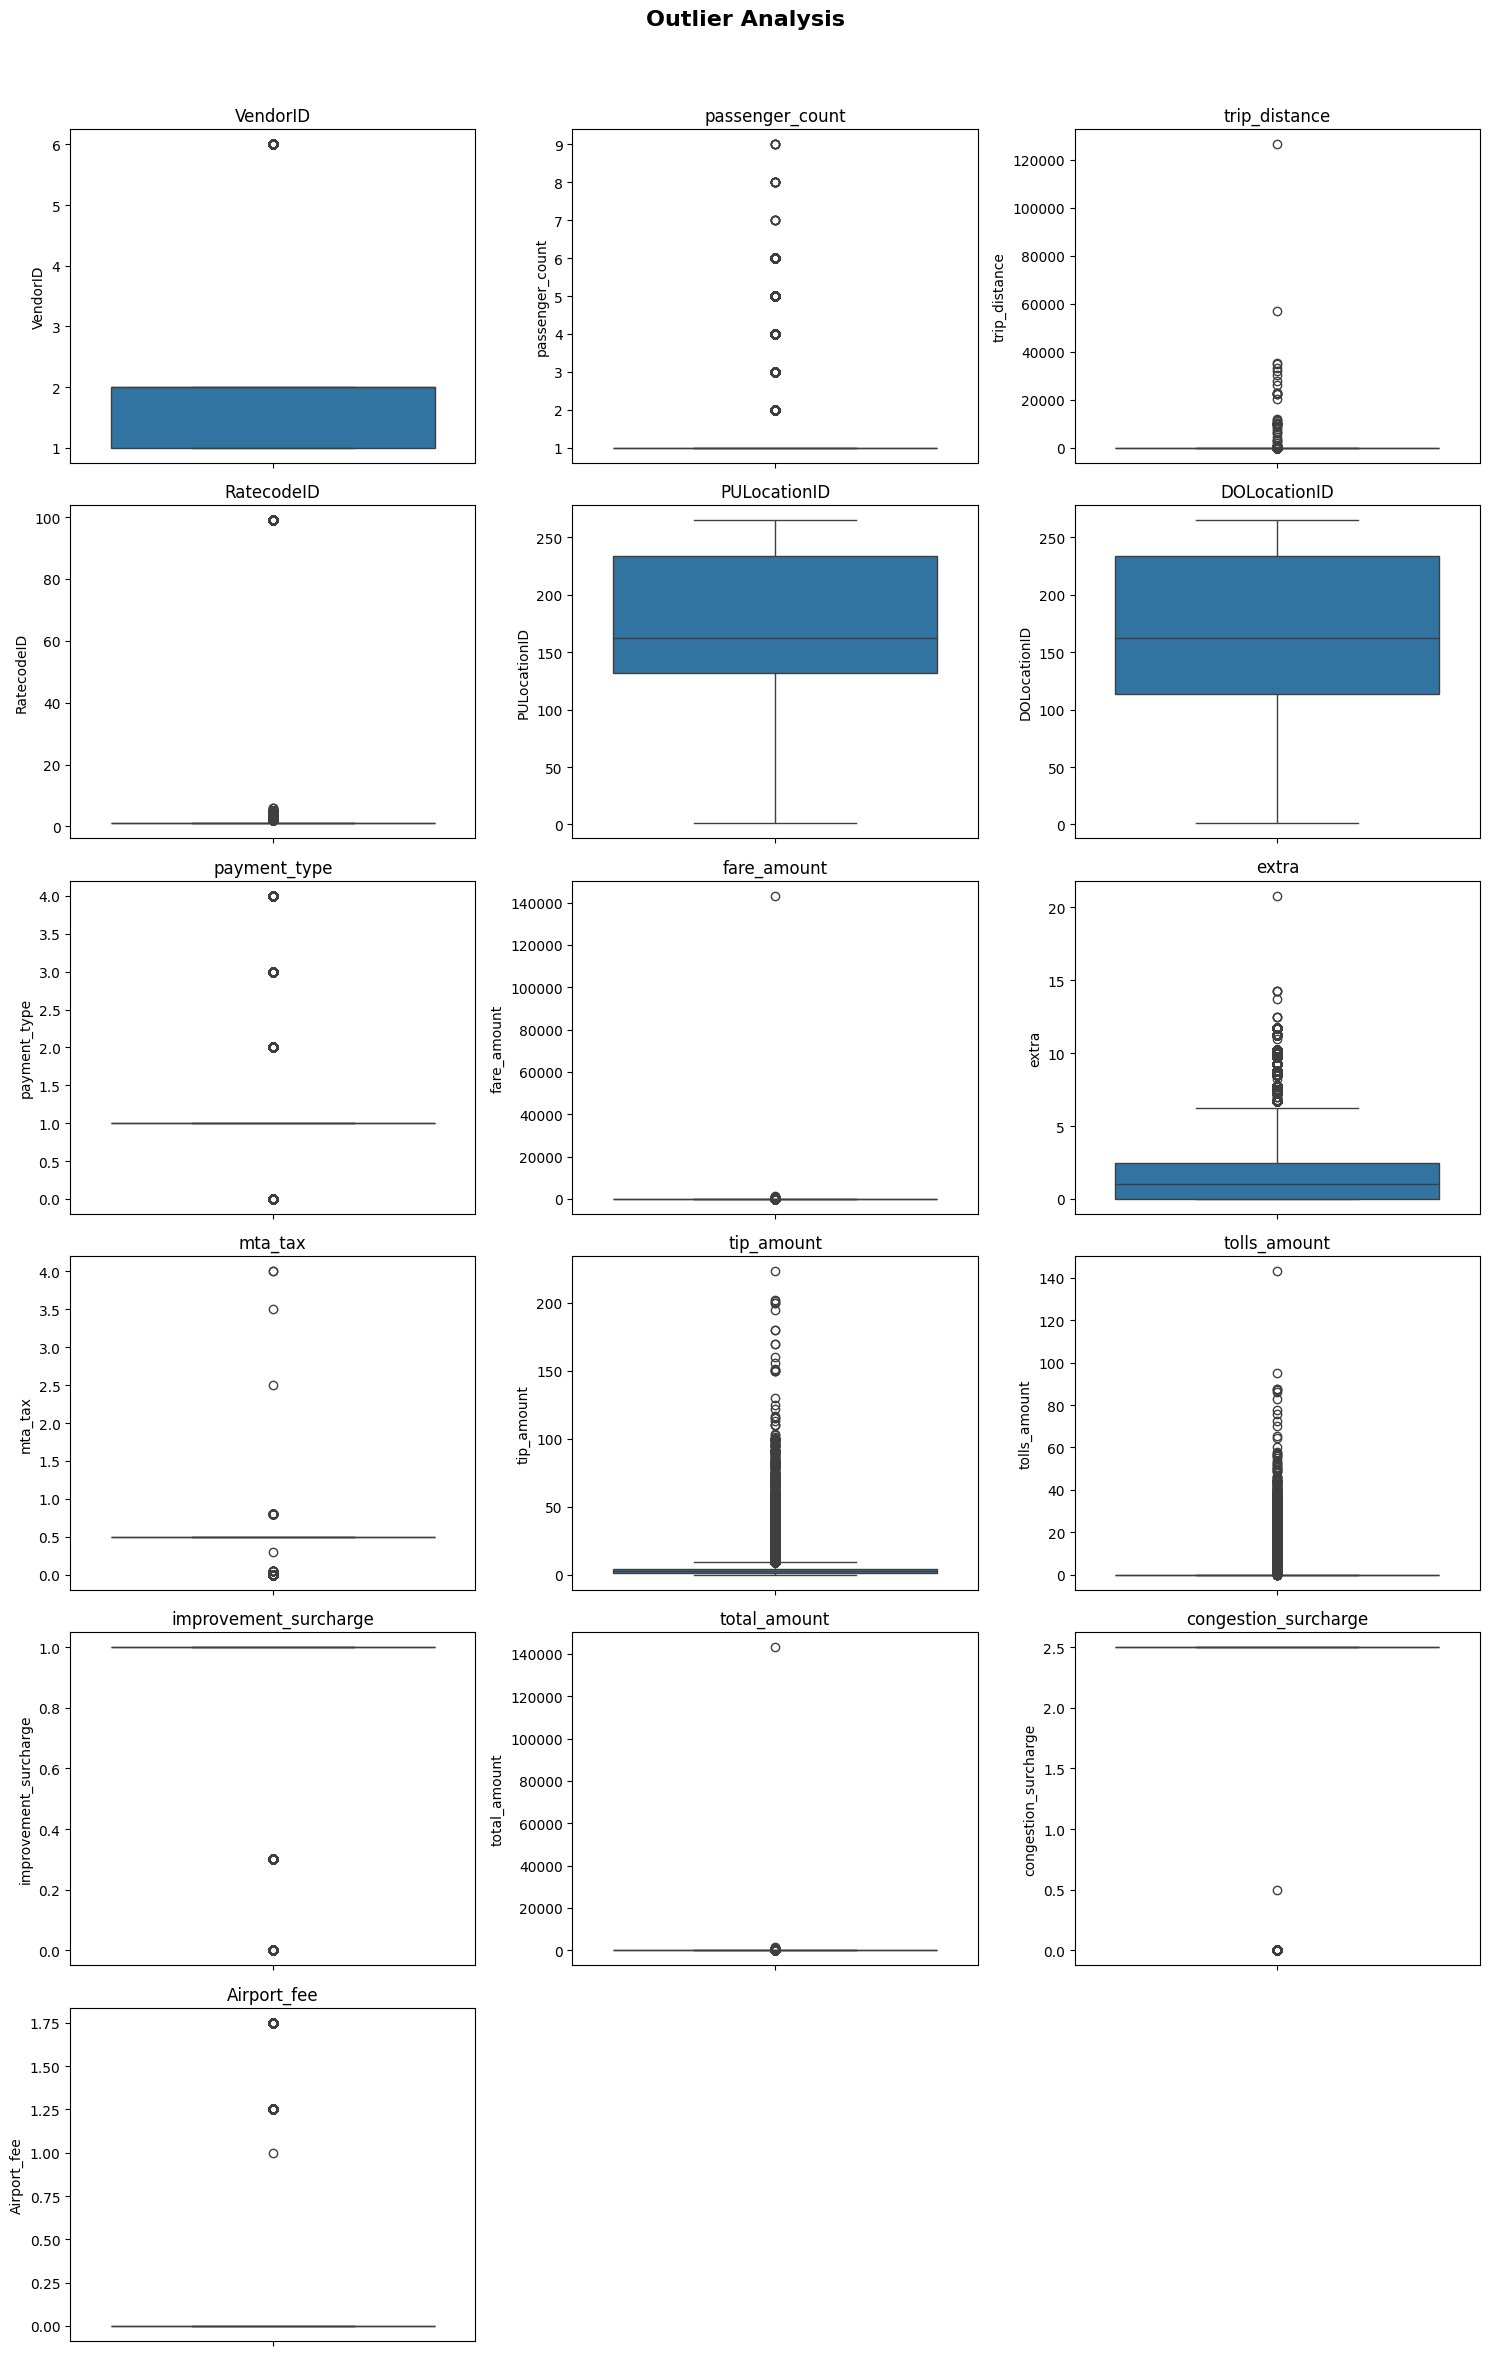

In [80]:
numeric_cols = df.select_dtypes(include=['number'])
num_cols = len(numeric_cols.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 plots per row

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
fig.suptitle("Outlier Analysis", fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(data=numeric_cols[col], ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")  # Remove x-labels for clarity
    axes[i].set_ylabel(col, fontsize=10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [83]:
(df['passenger_count'] > 6).sum()

np.int64(21)

In [85]:
df[df['passenger_count'] > 6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
91342           2  2023-09-18 13:07:26   2023-09-18 14:05:27              8.0   
92588           2  2023-09-18 17:26:13   2023-09-18 17:52:25              7.0   
181604          2  2023-02-08 23:26:39   2023-02-08 23:26:51              9.0   
243715          2  2023-02-19 17:19:13   2023-02-19 17:57:24              9.0   
343703          2  2023-04-09 09:22:54   2023-04-09 09:23:22              7.0   
412382          2  2023-04-21 16:44:17   2023-04-21 16:44:19              8.0   
432298          2  2023-04-28 02:24:47   2023-04-28 02:25:01              8.0   
685102          2  2023-07-16 16:33:55   2023-07-16 16:34:00              8.0   
849518          2  2023-01-19 16:33:22   2023-01-19 17:57:32              8.0   
1072724         2  2023-05-29 02:35:04   2023-05-29 02:35:16              7.0   
1165482         2  2023-10-15 08:11:40   2023-10-15 08:39:01              7.0   
1196033         2  2023-10-20 16:55:31   2023-10-20 16:56:27              7.0   
1320036         2  2023-06-11 11:53:08   2023-06-11 11:53:29              9.0   
1445167         2  2023-12-04 15:32:03   2023-12-04 15:32:08              9.0   
1479630         2  2023-12-09 22:01:38   2023-12-09 22:01:40              8.0   
1545959         2  2023-12-20 19:26:27   2023-12-20 19:33:17              9.0   
1558339         2  2023-12-22 23:00:21   2023-12-22 23:00:24              8.0   
1564861         2  2023-12-26 17:38:04   2023-12-26 17:38:06              8.0   
1660878         2  2023-08-16 06:10:57   2023-08-16 06:49:47              8.0   
1683310         2  2023-08-21 01:53:09   2023-08-21 01:53:11              8.0   
1890225         2  2023-11-30 00:13:36   2023-11-30 00:13:39              8.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
91342            31.71         5.0                  N            48   
92588             5.11         5.0                  N           246   
181604            0.13         5.0                  N           231   
243715           16.79         5.0                  N           186   
343703            0.00         5.0                  N           125   
412382            0.00         5.0                  N           264   
432298            0.00         5.0                  N            87   
685102            0.00         5.0                  N           233   
849518           18.30         5.0                  N           230   
1072724           0.00         5.0                  N           256   
1165482           7.60         5.0                  N           246   
1196033          16.17         5.0                  N           132   
1320036           0.00         5.0                  N           138   
1445167           0.00         5.0                  N           132   
1479630           0.00         5.0                  N            79   
1545959           0.07         5.0                  N           112   
1558339           0.09         5.0                  N           236   
1564861           0.45         5.0                  N           216   
1660878          19.03         5.0                  N           132   
1683310           0.00         5.0                  N           264   
1890225           0.00         5.0                  N            90   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
91342             219             1        88.90    0.0      0.5       10.00   
92588             265             1        70.00    0.0      0.0        0.00   
181604            231             1        95.55    0.0      0.5       19.91   
243715              1             1        90.00    0.0      0.0       18.00   
343703            125             1        80.00    0.0      0.5        0.00   
412382            264             1        86.00    0.0      0.0       10.10   
432298             87             2        85.00    0.0      0.5        0.00   
685102            233  

In [86]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [87]:
df[df['passenger_count'] > 6]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [88]:
# Continue with outlier handling
df.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.896379e+06     1.896379e+06   1.896379e+06  1.896379e+06   
mean   1.733023e+00     1.372162e+00   3.858274e+00  1.612944e+00   
std    4.476417e-01     8.641241e-01   1.294093e+02  7.267292e+00   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.790000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.400000e+00  1.000000e+00   
max    6.000000e+00     6.000000e+00   1.263605e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.896379e+06  1.896379e+06  1.896379e+06  1.896379e+06  1.896379e+06   
mean   1.652813e+02  1.640513e+02  1.163817e+00  1.991864e+01  1.588037e+00   
std    6.400031e+01  6.980194e+01  5.081399e-01  1.055374e+02  1.829197e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00   
75%    2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.896379e+06  1.896379e+06  1.896379e+06           1.896379e+06   
mean   4.953199e-01  3.546942e+00  5.965016e-01           9.990529e-01   
std    4.845034e-02  4.054757e+00  2.187772e+00           2.835751e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.850000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  4.420000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  2.230800e+02  1.430000e+02           1.000000e+00   

       total_amount  congestion_surcharge   Airport_fee  
count  1.896379e+06          1.896379e+06  1.831505e+06  
mean   2.898137e+01          2.314274e+00  1.429239e-01  
std    1.064165e+02          6.556071e-01  4.648637e-01  
min    0.000000e+00          0.000000e+00  0.000000e+00  
25%    1.596000e+01          2.500000e+00  0.000000e+00  
50%    2.100000e+01          2.500000e+00  0.000000e+00  
75%    3.094000e+01          2.500000e+00  0.000000e+00  
max    1.431675e+05          2.500000e+00  1.750000e+00

In [89]:
# Entries where trip_distance ≈ 0 and fare_amount > 300
print("Total entries where trip_distance ≈ 0 and fare_amount > 300:-",((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)).sum())
df[((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

Total entries where trip_distance ≈ 0 and fare_amount > 300:- 35


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
8018            2  2023-09-02 22:01:05   2023-09-02 22:01:20              1.0   
182061          1  2023-02-09 07:37:30   2023-02-09 07:39:13              1.0   
315645          2  2023-04-05 21:16:43   2023-04-05 21:25:57              1.0   
446020          2  2023-04-30 14:21:36   2023-04-30 14:22:11              4.0   
614222          1  2023-03-31 16:56:04   2023-03-31 16:57:02              1.0   
680258          2  2023-07-15 16:08:15   2023-07-15 16:08:35              2.0   
740932          2  2023-07-27 19:30:15   2023-07-27 19:30:50              1.0   
798806          1  2023-01-09 16:17:32   2023-01-09 16:20:41              1.0   
807205          1  2023-01-11 12:38:54   2023-01-11 12:38:54              1.0   
850988          2  2023-01-19 20:58:47   2023-01-19 20:58:51              4.0   
977887          1  2023-05-15 13:28:42   2023-05-15 13:29:45              1.0   
1023654         2  2023-05-19 21:04:06   2023-05-19 21:04:22              2.0   
1039827         2  2023-05-22 19:38:15   2023-05-22 19:38:38              1.0   
1046790         2  2023-05-24 02:11:35   2023-05-24 02:11:57              1.0   
1134518         2  2023-10-09 21:36:01   2023-10-09 21:39:15              1.0   
1150204         1  2023-10-13 18:22:04   2023-10-13 18:22:38              1.0   
1192961         2  2023-10-20 01:11:27   2023-10-20 01:13:03              1.0   
1301442         1  2023-06-08 04:59:03   2023-06-08 04:59:38              2.0   
1313351         2  2023-06-10 01:58:47   2023-06-10 01:59:16              1.0   
1314222         1  2023-06-10 10:40:51   2023-06-10 10:41:38              1.0   
1350327         2  2023-06-16 17:16:53   2023-06-16 17:17:05              4.0   
1368988         2  2023-06-20 15:38:20   2023-06-20 15:38:30              1.0   
1373469         2  2023-06-21 12:05:21   2023-06-21 12:05:42              1.0   
1393465         1  2023-06-24 19:41:42   2023-06-24 19:43:18              1.0   
1419098         2  2023-06-29 20:56:07   2023-06-29 20:56:15              1.0   
1466409         2  2023-12-07 23:39:43   2023-12-07 23:39:59              1.0   
1571283         2  2023-12-24 14:01:07   2023-12-24 14:01:44              1.0   
1592833         1  2023-08-01 11:12:09   2023-08-01 11:12:09              1.0   
1596140         2  2023-08-01 22:06:03   2023-08-01 22:06:41              2.0   
1650742         2  2023-08-13 18:44:08   2023-08-13 18:44:22              4.0   
1682940         2  2023-08-20 21:39:04   2023-08-20 21:39:12              2.0   
1682949         2  2023-08-20 21:56:48   2023-08-20 21:56:59              2.0   
1703337         2  2023-08-25 16:13:28   2023-08-25 16:13:42              2.0   
1712699         2  2023-08-27 18:46:43   2023-08-27 18:47:01              1.0   
1877775         2  2023-11-26 16:04:06   2023-11-26 16:04:12              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
8018              0.00         5.0                  N           226   
182061            0.00         5.0                  N           246   
315645            0.00         5.0                  N           265   
446020            0.08         5.0                  N           130   
614222            0.00         5.0                  N           181   
680258            0.00         5.0                  N           265   
740932            0.00         5.0                  N           265   
798806            0.00         5.0                  N           141   
807205            0.00        99.0                  N           264   
850988            0.00         5.0                  N           265   
977887            0.00         5.0                  N           145   
1023654           0.00         5.0                  N           265   
1039827           0.00         5.0                  N           265   
1046790           0.00         5.0                  N           265   
1134518           0.00     

In [90]:
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

In [91]:
df[((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [92]:
# Entrieswhere trip_distance = 0 & fare_amount =0, but pickup and dropoff locations are different
df[((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
88795           1  2023-09-17 20:40:48   2023-09-17 20:40:48              1.0   
99034           2  2023-09-19 21:27:12   2023-09-19 21:27:48              1.0   
131705          1  2023-09-29 11:12:42   2023-09-29 11:12:42              1.0   
141376          1  2023-02-01 08:20:36   2023-02-01 08:20:36              6.0   
143660          2  2023-02-01 16:53:34   2023-02-01 16:54:13              1.0   
...           ...                  ...                   ...              ...   
1809555         1  2023-11-14 13:15:43   2023-11-14 13:25:53              1.0   
1827287         1  2023-11-17 10:27:38   2023-11-17 10:27:38              1.0   
1827349         1  2023-11-17 10:27:39   2023-11-17 10:27:39              1.0   
1828143         1  2023-11-17 13:28:12   2023-11-17 13:52:16              1.0   
1859575         1  2023-11-22 05:13:37   2023-11-22 05:40:20              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
88795              0.0         5.0                  N            79   
99034              0.0         1.0                  N             7   
131705             0.0         5.0                  Y           128   
141376             0.0        99.0                  Y           145   
143660             0.0         1.0                  N           193   
...                ...         ...                ...           ...   
1809555            0.0         1.0                  N            74   
1827287            0.0         1.0                  N           261   
1827349            0.0         1.0                  N           261   
1828143            0.0        99.0                  N            74   
1859575            0.0         1.0                  N           167   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
88795             264             2          0.0    0.0      0.0         0.0   
99034             193             1          0.0    0.0      0.0         0.0   
131705            264             2          0.0    0.0      0.0         0.0   
141376            264             2          0.0    0.0      0.0         0.0   
143660              7             1          0.0    0.0      0.0         0.0   
...               ...           ...          ...    ...      ...         ...   
1809555            41             1          0.0    2.5      0.5         0.0   
1827287           264             2          0.0    0.0      0.0         0.0   
1827349           264             2          0.0    0.0      0.0         0.0   
1828143           234             1          0.0    0.0      0.0         0.0   
1859575           137             1          0.0    0.0      0.0         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
88795             0.0                    0.0           0.0   
99034             0.0                    0.0           0.0   
131705            0.0                    0.0           0.0   
141376            0.0                    0.0           0.0   
143660            0.0                    0.0           0.0   
...               ...                    ...           ...   
1809555           0.0                    1.0           4.0   
1827287           0.0                    0.0           0.0   
1827349           0.0                    0.0           0.0   
1828143           0.0                    0.0           0.0   
1859575           0.0                    0.0           0.0   

         congestion_surcharge  Airport_fee  
88795                     0.0          0.0  
99034                     0.0          0.0  
131705                    0.0          0.0  
141376                    0.0          0.0  
143660                    0.0          0.0  
...                       ...          ...  
1809555                   2.5          0.0  
1827287                   0.0          0.0  
1827349                   0.0          0.0  
1828143                   0

In [93]:
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

In [94]:
df[((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [95]:
# Records with trip_distance greater than 250 miles
df[df['trip_distance'] >250]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
47537           2  2023-09-10 13:44:00   2023-09-10 14:16:00              1.0   
85867           1  2023-09-17 07:23:50   2023-09-17 07:48:20              1.0   
98199           2  2023-09-19 19:36:56   2023-09-19 19:48:16              1.0   
116640          2  2023-09-26 19:41:43   2023-09-26 20:01:00              1.0   
170119          2  2023-02-06 19:56:52   2023-02-06 20:33:55              2.0   
191509          2  2023-02-10 19:53:45   2023-02-10 20:01:48              2.0   
215489          2  2023-02-15 13:06:00   2023-02-15 13:40:00              1.0   
224984          2  2023-02-17 07:17:00   2023-02-17 07:25:00              1.0   
229776          2  2023-02-17 22:36:00   2023-02-17 23:00:00              1.0   
244925          2  2023-02-19 22:06:00   2023-02-19 22:22:00              1.0   
348476          2  2023-04-17 10:56:00   2023-04-17 11:25:00              1.0   
417628          2  2023-04-22 14:58:35   2023-04-22 15:23:03              1.0   
462285          2  2023-03-02 15:45:34   2023-03-02 16:00:45              1.0   
475481          2  2023-03-03 19:47:00   2023-03-03 20:05:00              1.0   
502742          2  2023-03-10 19:12:22   2023-03-10 19:18:55              1.0   
607885          2  2023-03-30 14:07:00   2023-03-30 15:32:00              1.0   
654977          2  2023-07-10 17:33:19   2023-07-10 19:14:56              1.0   
666441          2  2023-07-12 21:05:00   2023-07-12 21:10:00              1.0   
669897          2  2023-07-13 15:38:02   2023-07-13 16:09:33              1.0   
675032          2  2023-07-14 15:32:30   2023-07-14 16:18:58              1.0   
702162          2  2023-07-20 04:22:00   2023-07-20 04:42:00              1.0   
742894          2  2023-07-28 08:10:00   2023-07-28 08:47:00              1.0   
791159          2  2023-01-07 20:02:05   2023-01-07 20:07:10              1.0   
872163          2  2023-01-24 06:27:00   2023-01-24 07:18:00              1.0   
897547          2  2023-01-28 18:16:37   2023-01-28 18:41:22              1.0   
898310          2  2023-01-28 20:39:00   2023-01-28 20:59:00              1.0   
920290          2  2023-05-08 15:22:51   2023-05-08 16:02:16              1.0   
957196          2  2023-05-11 19:43:07   2023-05-11 20:01:07              1.0   
984089          2  2023-05-12 15:12:50   2023-05-12 16:03:58              1.0   
1054334         2  2023-05-25 11:10:00   2023-05-25 11:35:00              1.0   
1061647         2  2023-05-26 16:22:00   2023-05-26 16:56:00              1.0   
1073816         2  2023-05-29 13:13:00   2023-05-29 14:23:00              1.0   
1086978         2  2023-10-01 00:05:00   2023-10-01 00:19:00              1.0   
1251724         2  2023-10-30 07:13:00   2023-10-30 07:33:00              1.0   
1274019         2  2023-06-03 06:23:00   2023-06-03 06:31:00              1.0   
1329350         2  2023-06-13 09:59:00   2023-06-13 10:12:00              1.0   
1377960         2  2023-06-22 06:34:00   2023-06-22 06:47:00              1.0   
1401447         2  2023-06-26 13:45:44   2023-06-26 13:51:12              2.0   
1424756         2  2023-06-30 23:40:00   2023-07-01 00:11:00              1.0   
1473161         2  2023-12-08 23:45:00   2023-12-09 00:14:00              1.0   
1480631         2  2023-12-10 01:11:00   2023-12-10 01:25:00              1.0   
1484096         2  2023-12-10 17:10:00   2023-12-10 17:12:00              1.0   
1566144         1  2023-12-27 06:00:00   2023-12-27 07:22:13              1.0   
1585279         2  2023-12-30 13:24:39   2023-12-30 14:07:52              1.0   
1672431         1  2023-08-18 14:26:43   2023-08-18 15:04:09              1.0   
1844556         2  2023-11-20 11:46:00   2023-11-20 12:30:00              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
47537         22910.92         1.0                  N           163   
85867         10452.60        99.0                  N      

In [96]:
df = df[df['trip_distance'] <= 250]

In [97]:
df[df['trip_distance'] >250]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [98]:
#Records with Payment type 0
df[df['payment_type'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-09-01 00:39:59   2023-09-01 01:00:28              1.0   
85              2  2023-09-01 00:01:15   2023-09-01 00:07:07              1.0   
151             2  2023-09-01 01:58:13   2023-09-01 02:12:29              1.0   
203             2  2023-09-01 01:08:34   2023-09-01 01:20:38              1.0   
251             1  2023-09-01 02:29:04   2023-09-01 02:45:34              1.0   
...           ...                  ...                   ...              ...   
1896373         2  2023-11-30 23:38:07   2023-11-30 23:50:50              1.0   
1896376         1  2023-11-30 23:49:26   2023-11-30 23:56:00              1.0   
1896391         2  2023-11-30 23:44:13   2023-11-30 23:52:02              1.0   
1896392         2  2023-11-30 23:17:41   2023-11-30 23:32:07              1.0   
1896395         1  2023-11-30 23:01:23   2023-11-30 23:14:15              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 4.71         1.0                  N           113   
85                1.07         1.0                  N           148   
151               3.32         1.0                  N           211   
203               2.67         1.0                  N           144   
251               0.00         1.0                  N            79   
...                ...         ...                ...           ...   
1896373           1.35         1.0                  N           161   
1896376           0.00         1.0                  N           114   
1896391           1.01         1.0                  N           161   
1896392           3.64         1.0                  N            80   
1896395           0.00         1.0                  N           163   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 238             0        24.83    0.0      0.5        4.32   
85                  4             0        11.88    0.0      0.5        2.00   
151               230             0        19.04    0.0      0.5        4.61   
203                65             0        19.89    0.0      0.5        4.30   
251                48             0        19.85    0.0      0.5        0.00   
...               ...           ...          ...    ...      ...         ...   
1896373           164             0        14.62    0.0      0.5        0.00   
1896376           148             0        18.20    0.0      0.5        0.00   
1896391           141             0        11.33    0.0      0.5        0.00   
1896392            45             0        25.09    0.0      0.5        0.00   
1896395           238             0        18.73    0.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         33.15   
85                0.0                    1.0         17.88   
151               0.0                    1.0         27.65   
203               0.0                    1.0         28.19   
251               0.0                    1.0         23.85   
...               ...                    ...           ...   
1896373           0.0                    1.0         18.62   
1896376           0.0                    1.0         22.20   
1896391           0.0                    1.0         15.33   
1896392           0.0                    1.0         29.09   
1896395           0.0                    1.0         22.73   

         congestion_surcharge  Airport_fee  
0                         2.5          NaN  
85                        2.5          NaN  
151                       2.5          NaN  
203                       2.5          NaN  
251                       2.5          NaN  
...                       ...          ...  
1896373                   2.5          NaN  
1896376                   2.5          NaN  
1896391                   2.5          NaN  
1896392                   2

In [99]:
df[df['payment_type'] == 0].describe()

VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
count  64844.000000          64844.0   64844.000000     64844.0  64844.000000   
mean       1.640183              1.0       3.433828         1.0    160.261335   
std        0.606052              0.0       4.206316         0.0     72.446532   
min        1.000000              1.0       0.000000         1.0      1.000000   
25%        1.000000              1.0       0.600000         1.0    107.000000   
50%        2.000000              1.0       2.120000         1.0    161.000000   
75%        2.000000              1.0       4.460000         1.0    234.000000   
max        6.000000              1.0      46.700000         1.0    265.000000   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  64844.000000       64844.0  64844.000000  64844.000000  64844.000000   
mean     156.013216           0.0     22.569562      0.171122      0.494764   
std       71.026218           0.0     14.174135      0.742315      0.050896   
min        1.000000           0.0      0.000000      0.000000      0.000000   
25%      107.000000           0.0     12.950000      0.000000      0.500000   
50%      152.000000           0.0     18.720000      0.000000      0.500000   
75%      231.000000           0.0     27.860000      0.000000      0.500000   
max      265.000000           0.0    196.820000     20.800000      0.500000   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  64844.000000  64844.000000           64844.000000  64844.000000   
mean       2.794145      0.616119               0.992180     29.915215   
std        3.465846      2.296442               0.079119     17.656051   
min        0.000000      0.000000               0.000000      0.000000   
25%        0.000000      0.000000               1.000000     19.010000   
50%        2.000000      0.000000               1.000000     24.840000   
75%        4.120000      0.000000               1.000000     35.000000   
max       54.720000     38.250000               1.000000    238.910000   

       congestion_surcharge  Airport_fee  
count               64844.0          0.0  
mean                    2.5          NaN  
std                     0.0          NaN  
min                     2.5          NaN  
25%                     2.5          NaN  
50%                     2.5          NaN  
75%                     2.5          NaN  
max                     2.5          NaN

In [100]:
#Dropping rows where trip_distance == 0 and fare_amount == 0
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0))]

In [101]:
df[((df['payment_type'] == 0) &(df['trip_distance'] == 0) & (df['fare_amount'] == 0))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [102]:
df[df['payment_type'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-09-01 00:39:59   2023-09-01 01:00:28              1.0   
85              2  2023-09-01 00:01:15   2023-09-01 00:07:07              1.0   
151             2  2023-09-01 01:58:13   2023-09-01 02:12:29              1.0   
203             2  2023-09-01 01:08:34   2023-09-01 01:20:38              1.0   
251             1  2023-09-01 02:29:04   2023-09-01 02:45:34              1.0   
...           ...                  ...                   ...              ...   
1896373         2  2023-11-30 23:38:07   2023-11-30 23:50:50              1.0   
1896376         1  2023-11-30 23:49:26   2023-11-30 23:56:00              1.0   
1896391         2  2023-11-30 23:44:13   2023-11-30 23:52:02              1.0   
1896392         2  2023-11-30 23:17:41   2023-11-30 23:32:07              1.0   
1896395         1  2023-11-30 23:01:23   2023-11-30 23:14:15              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 4.71         1.0                  N           113   
85                1.07         1.0                  N           148   
151               3.32         1.0                  N           211   
203               2.67         1.0                  N           144   
251               0.00         1.0                  N            79   
...                ...         ...                ...           ...   
1896373           1.35         1.0                  N           161   
1896376           0.00         1.0                  N           114   
1896391           1.01         1.0                  N           161   
1896392           3.64         1.0                  N            80   
1896395           0.00         1.0                  N           163   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 238             0        24.83    0.0      0.5        4.32   
85                  4             0        11.88    0.0      0.5        2.00   
151               230             0        19.04    0.0      0.5        4.61   
203                65             0        19.89    0.0      0.5        4.30   
251                48             0        19.85    0.0      0.5        0.00   
...               ...           ...          ...    ...      ...         ...   
1896373           164             0        14.62    0.0      0.5        0.00   
1896376           148             0        18.20    0.0      0.5        0.00   
1896391           141             0        11.33    0.0      0.5        0.00   
1896392            45             0        25.09    0.0      0.5        0.00   
1896395           238             0        18.73    0.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         33.15   
85                0.0                    1.0         17.88   
151               0.0                    1.0         27.65   
203               0.0                    1.0         28.19   
251               0.0                    1.0         23.85   
...               ...                    ...           ...   
1896373           0.0                    1.0         18.62   
1896376           0.0                    1.0         22.20   
1896391           0.0                    1.0         15.33   
1896392           0.0                    1.0         29.09   
1896395           0.0                    1.0         22.73   

         congestion_surcharge  Airport_fee  
0                         2.5          NaN  
85                        2.5          NaN  
151                       2.5          NaN  
203                       2.5          NaN  
251                       2.5          NaN  
...                       ...          ...  
1896373                   2.5          NaN  
1896376                   2.5          NaN  
1896391                   2.5          NaN  
1896392                   2

In [103]:
#Assigning the most common valid payment_type to these rows:
most_common_payment = df.loc[df['payment_type'] != 0, 'payment_type'].mode()[0]
df['payment_type'].replace(0, most_common_payment, inplace=True)

In [104]:
df[df['payment_type'] == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [105]:
# Do any columns need standardising?
df[df['tolls_amount']>100] #Handling high toll amounts

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
401080         1  2023-04-20 18:45:45   2023-04-20 18:46:08              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
401080            0.0         1.0                  Y           265   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
401080           265             1          3.0    2.5      0.5         5.0   

        tolls_amount  improvement_surcharge  total_amount  \
401080         143.0                    1.0         155.0   

        congestion_surcharge  Airport_fee  
401080                   0.0          0.0

In [106]:
df = df[df['tolls_amount']<100]

In [107]:
df[df['tolls_amount']>100]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [108]:
df[df['RatecodeID']>6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
292             1  2023-09-01 04:45:52   2023-09-01 05:34:00              1.0   
306             1  2023-09-01 04:51:32   2023-09-01 05:38:17              1.0   
352             1  2023-09-01 06:39:37   2023-09-01 07:14:57              1.0   
361             1  2023-09-01 06:57:26   2023-09-01 07:40:25              1.0   
372             1  2023-09-01 06:46:32   2023-09-01 07:09:09              1.0   
...           ...                  ...                   ...              ...   
1893557         1  2023-11-30 16:35:53   2023-11-30 17:15:22              1.0   
1893693         1  2023-11-30 17:13:54   2023-11-30 17:53:59              1.0   
1893861         1  2023-11-30 17:11:17   2023-11-30 18:21:00              1.0   
1894218         1  2023-11-30 18:02:44   2023-11-30 18:41:34              1.0   
1894558         1  2023-11-30 19:40:57   2023-11-30 20:28:53              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
292                4.0        99.0                  N           123   
306               10.9        99.0                  N            89   
352                6.1        99.0                  N            63   
361               12.0        99.0                  N           180   
372                4.7        99.0                  N            10   
...                ...         ...                ...           ...   
1893557            0.0        99.0                  N           137   
1893693            3.6        99.0                  N            95   
1893861           10.5        99.0                  N           107   
1894218            9.9        99.0                  N            92   
1894558            0.0        99.0                  N           162   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
292               227             1         22.5    0.0      0.5         0.0   
306                79             1         30.5    0.0      0.5         0.0   
352               181             1         27.5    0.0      0.5         0.0   
361               262             1         41.5    0.0      0.5         0.0   
372               258             1         25.5    0.0      0.5         0.0   
...               ...           ...          ...    ...      ...         ...   
1893557           228             1         36.5    0.0      0.5         0.0   
1893693            82             1         22.5    0.0      0.5         0.0   
1893861            91             1         40.5    0.0      0.5         0.0   
1894218            81             1         34.5    0.0      0.5         0.0   
1894558           235             1         33.5    0.0      0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
292              0.00                    1.0         24.00   
306              6.94                    1.0         38.94   
352              0.00                    1.0         29.00   
361              6.94                    1.0         49.94   
372              0.00                    1.0         27.00   
...               ...                    ...           ...   
1893557          6.94                    1.0         44.94   
1893693          0.00                    1.0         24.00   
1893861          6.94                    1.0         48.94   
1894218          0.00                    1.0         36.00   
1894558          0.00                    1.0         35.00   

         congestion_surcharge  Airport_fee  
292                       0.0          0.0  
306                       0.0          0.0  
352                       0.0          0.0  
361                       0.0          0.0  
372                       0.0          0.0  
...                       ...          ...  
1893557                   0.0          0.0  
1893693                   0.0          0.0  
1893861                   0.0          0.0  
1894218                   0

In [109]:
# Find the mode (most common value) of RatecodeID
most_common_ratecode = df.loc[df['RatecodeID'] <= 6, 'RatecodeID'].mode()[0]

# Replace RatecodeID values greater than 6 with the mode
df.loc[df['RatecodeID'] > 6, 'RatecodeID'] = most_common_ratecode

In [110]:
df.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.895972e+06     1.895972e+06   1.895972e+06  1.895972e+06   
mean   1.733081e+00     1.372201e+00   3.444939e+00  1.071577e+00   
std    4.476125e-01     8.641575e-01   4.534716e+00  3.860358e-01   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.800000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.400000e+00  1.000000e+00   
max    6.000000e+00     6.000000e+00   2.048600e+02  6.000000e+00   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.895972e+06  1.895972e+06  1.895972e+06  1.895972e+06  1.895972e+06   
mean   1.652813e+02  1.640491e+02  1.197859e+00  1.991356e+01  1.588327e+00   
std    6.399886e+01  6.980095e+01  4.596630e-01  1.055287e+02  1.829228e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00   
75%    2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.895972e+06  1.895972e+06  1.895972e+06           1.895972e+06   
mean   4.954014e-01  3.547273e+00  5.965139e-01           9.991795e-01   
std    4.803571e-02  4.052163e+00  2.185444e+00           2.603788e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.850000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  4.420000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  2.230800e+02  9.500000e+01           1.000000e+00   

       total_amount  congestion_surcharge   Airport_fee  
count  1.895972e+06          1.895972e+06  1.831131e+06  
mean   2.897745e+01          2.314678e+00  1.429256e-01  
std    1.064073e+02          6.549500e-01  4.648664e-01  
min    0.000000e+00          0.000000e+00  0.000000e+00  
25%    1.596000e+01          2.500000e+00  0.000000e+00  
50%    2.100000e+01          2.500000e+00  0.000000e+00  
75%    3.094000e+01          2.500000e+00  0.000000e+00  
max    1.431675e+05          2.500000e+00  1.750000e+00

In [111]:
df[df['tip_amount']>100]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
972             1  2023-09-01 10:30:08   2023-09-01 10:58:23              3.0   
36741           2  2023-09-08 16:47:42   2023-09-08 17:10:12              1.0   
39660           1  2023-09-09 01:04:43   2023-09-09 01:28:40              3.0   
159844          1  2023-02-04 15:08:24   2023-02-04 15:16:41              1.0   
219672          2  2023-02-16 08:44:38   2023-02-16 08:48:24              6.0   
263374          2  2023-02-24 17:34:53   2023-02-24 17:37:04              1.0   
543601          1  2023-03-16 16:18:04   2023-03-16 17:31:19              1.0   
632675          1  2023-07-05 15:02:35   2023-07-05 15:13:44              1.0   
649498          1  2023-07-09 12:08:25   2023-07-09 12:39:10              3.0   
700239          2  2023-07-19 18:41:01   2023-07-19 19:16:51              2.0   
879485          1  2023-01-25 14:14:07   2023-01-25 14:14:12              2.0   
888520          2  2023-01-27 03:10:09   2023-01-27 03:11:57              1.0   
922205          1  2023-05-08 21:50:11   2023-05-08 21:50:18              1.0   
943225          1  2023-05-04 15:23:02   2023-05-04 15:23:28              1.0   
1126725         2  2023-10-08 04:51:22   2023-10-08 05:04:01              2.0   
1149384         1  2023-10-13 16:24:31   2023-10-13 17:29:24              2.0   
1195574         2  2023-10-20 15:08:42   2023-10-20 16:57:01              1.0   
1200099         2  2023-10-21 09:30:12   2023-10-21 09:53:43              1.0   
1297223         1  2023-06-07 13:58:40   2023-06-07 14:05:58              1.0   
1340383         1  2023-06-14 23:04:48   2023-06-15 00:06:24              1.0   
1340699         1  2023-06-15 01:07:09   2023-06-15 01:07:18              2.0   
1377424         1  2023-06-21 23:18:34   2023-06-22 00:11:12              1.0   
1424526         2  2023-06-30 22:49:09   2023-06-30 23:04:48              1.0   
1453726         2  2023-12-06 00:13:22   2023-12-06 00:13:46              1.0   
1470482         2  2023-12-08 17:40:34   2023-12-08 19:18:35              1.0   
1506528         2  2023-12-14 13:42:55   2023-12-14 13:43:06              1.0   
1606936         1  2023-08-04 03:40:20   2023-08-04 03:41:08              1.0   
1611244         2  2023-08-05 00:54:56   2023-08-05 01:12:50              1.0   
1671908         1  2023-08-18 12:54:53   2023-08-18 12:55:02              1.0   
1840852         2  2023-11-19 14:52:36   2023-11-19 15:37:56              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
972              17.10         3.0                  N           100   
36741             1.17         1.0                  N           164   
39660             4.60         1.0                  N            79   
159844            5.40         1.0                  N           197   
219672            0.77         1.0                  N           186   
263374            0.00         1.0                  N           265   
543601           17.50         2.0                  N           132   
632675            1.20         1.0                  N           234   
649498           10.30         5.0                  N           231   
700239           16.94         2.0                  N           132   
879485            0.00         1.0                  N           265   
888520            0.53         1.0                  N           265   
922205            0.00         1.0                  N           265   
943225            0.00         1.0                  N           265   
1126725           2.65         1.0                  N           226   
1149384          17.60         5.0                  N           164   
1195574           0.00         1.0                  N           164   
1200099           1.30         1.0                  N            48   
1297223           1.50         1.0                  N            13   
1340383          16.40         1.0                  N            79   
134069

In [112]:
df[df['tip_amount']>100]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
972             1  2023-09-01 10:30:08   2023-09-01 10:58:23              3.0   
36741           2  2023-09-08 16:47:42   2023-09-08 17:10:12              1.0   
39660           1  2023-09-09 01:04:43   2023-09-09 01:28:40              3.0   
159844          1  2023-02-04 15:08:24   2023-02-04 15:16:41              1.0   
219672          2  2023-02-16 08:44:38   2023-02-16 08:48:24              6.0   
263374          2  2023-02-24 17:34:53   2023-02-24 17:37:04              1.0   
543601          1  2023-03-16 16:18:04   2023-03-16 17:31:19              1.0   
632675          1  2023-07-05 15:02:35   2023-07-05 15:13:44              1.0   
649498          1  2023-07-09 12:08:25   2023-07-09 12:39:10              3.0   
700239          2  2023-07-19 18:41:01   2023-07-19 19:16:51              2.0   
879485          1  2023-01-25 14:14:07   2023-01-25 14:14:12              2.0   
888520          2  2023-01-27 03:10:09   2023-01-27 03:11:57              1.0   
922205          1  2023-05-08 21:50:11   2023-05-08 21:50:18              1.0   
943225          1  2023-05-04 15:23:02   2023-05-04 15:23:28              1.0   
1126725         2  2023-10-08 04:51:22   2023-10-08 05:04:01              2.0   
1149384         1  2023-10-13 16:24:31   2023-10-13 17:29:24              2.0   
1195574         2  2023-10-20 15:08:42   2023-10-20 16:57:01              1.0   
1200099         2  2023-10-21 09:30:12   2023-10-21 09:53:43              1.0   
1297223         1  2023-06-07 13:58:40   2023-06-07 14:05:58              1.0   
1340383         1  2023-06-14 23:04:48   2023-06-15 00:06:24              1.0   
1340699         1  2023-06-15 01:07:09   2023-06-15 01:07:18              2.0   
1377424         1  2023-06-21 23:18:34   2023-06-22 00:11:12              1.0   
1424526         2  2023-06-30 22:49:09   2023-06-30 23:04:48              1.0   
1453726         2  2023-12-06 00:13:22   2023-12-06 00:13:46              1.0   
1470482         2  2023-12-08 17:40:34   2023-12-08 19:18:35              1.0   
1506528         2  2023-12-14 13:42:55   2023-12-14 13:43:06              1.0   
1606936         1  2023-08-04 03:40:20   2023-08-04 03:41:08              1.0   
1611244         2  2023-08-05 00:54:56   2023-08-05 01:12:50              1.0   
1671908         1  2023-08-18 12:54:53   2023-08-18 12:55:02              1.0   
1840852         2  2023-11-19 14:52:36   2023-11-19 15:37:56              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
972              17.10         3.0                  N           100   
36741             1.17         1.0                  N           164   
39660             4.60         1.0                  N            79   
159844            5.40         1.0                  N           197   
219672            0.77         1.0                  N           186   
263374            0.00         1.0                  N           265   
543601           17.50         2.0                  N           132   
632675            1.20         1.0                  N           234   
649498           10.30         5.0                  N           231   
700239           16.94         2.0                  N           132   
879485            0.00         1.0                  N           265   
888520            0.53         1.0                  N           265   
922205            0.00         1.0                  N           265   
943225            0.00         1.0                  N           265   
1126725           2.65         1.0                  N           226   
1149384          17.60         5.0                  N           164   
1195574           0.00         1.0                  N           164   
1200099           1.30         1.0                  N            48   
1297223           1.50         1.0                  N            13   
1340383          16.40         1.0                  N            79   
134069

In [113]:
#Impute fare_amount == 0 for trips with trip_distance > 0
# Calculate median fare per mile
median_fare_per_mile = df[df['fare_amount'] > 0].groupby('trip_distance')['fare_amount'].median()

# Apply imputation
df.loc[(df['fare_amount'] == 0) & (df['trip_distance'] > 0), 'fare_amount'] = \
    df['trip_distance'].map(median_fare_per_mile)

In [114]:
df[df['fare_amount'] <= 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [115]:
df[df['fare_amount'] >500]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
16824           1  2023-09-05 10:16:13   2023-09-05 10:20:56              1.0   
87613           2  2023-09-17 15:44:33   2023-09-17 17:15:05              4.0   
148930          1  2023-02-02 15:49:48   2023-02-02 18:07:33              1.0   
391922          2  2023-04-25 07:48:25   2023-04-25 10:24:26              1.0   
607681          2  2023-03-30 14:12:37   2023-03-30 16:44:19              2.0   
638392          1  2023-07-06 20:16:16   2023-07-06 22:14:35              2.0   
706798          2  2023-07-20 21:29:10   2023-07-21 15:39:10              1.0   
846464          1  2023-01-19 00:20:12   2023-01-19 03:38:58              1.0   
1083894         1  2023-05-31 15:44:45   2023-05-31 18:32:04              1.0   
1201965         2  2023-10-21 15:29:58   2023-10-21 17:35:53              1.0   
1264576         2  2023-06-01 16:00:51   2023-06-01 19:16:31              1.0   
1299972         2  2023-06-07 19:43:03   2023-06-07 21:37:26              1.0   
1344015         2  2023-06-15 16:58:49   2023-06-15 19:19:14              1.0   
1672714         2  2023-08-18 15:28:08   2023-08-18 20:15:05              1.0   
1838047         2  2023-11-18 23:27:17   2023-11-19 01:22:52              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
16824             0.70         1.0                  N           249   
87613            71.46         5.0                  N           234   
148930           83.20         4.0                  N           132   
391922          111.71         4.0                  N           265   
607681           81.03         4.0                  N           132   
638392          107.00         4.0                  N           132   
706798           11.34         1.0                  N           260   
846464          204.10         5.0                  N            70   
1083894          91.30         4.0                  N           132   
1201965         140.24         4.0                  N           132   
1264576          79.17         4.0                  N           132   
1299972         124.79         5.0                  N           236   
1344015          85.15         4.0                  N           132   
1672714         204.86         4.0                  N           132   
1838047         115.91         5.0                  N           132   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
16824              90             2    143163.45   2.50      0.5         0.0   
87613             265             4       550.00   0.00      0.0         0.0   
148930            265             1       521.70   1.25      0.5        20.0   
391922            265             2       601.50   0.00      0.5         0.0   
607681            265             2       519.60   1.25      0.0         0.0   
638392            265             1       728.90   2.75      0.5        10.0   
706798            260             2       786.30   1.00      0.5         0.0   
846464            265             2       600.00   0.00      0.0         0.0   
1083894           265             1       637.90   1.75      0.5        15.0   
1201965           265             2       604.30   0.00      0.5         0.0   
1264576           265             2       525.90   2.50      0.0         0.0   
1299972           265             2       720.00   0.00      0.0         0.0   
1344015           265             2       584.70   2.50      0.5         0.0   
1672714           265             2      1375.00   0.00      0.5         0.0   
1838047           265             2       700.00   0.00      0.0         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
16824            0.00                    1.0     143167.45   
87613           14.75                    1.0        565.75   
148930           6.55                    1.0        551.00   
391922          40.00                    1.0  

In [116]:
df.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.895972e+06     1.895972e+06   1.895972e+06  1.895972e+06   
mean   1.733081e+00     1.372201e+00   3.444939e+00  1.071577e+00   
std    4.476125e-01     8.641575e-01   4.534716e+00  3.860358e-01   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.800000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.400000e+00  1.000000e+00   
max    6.000000e+00     6.000000e+00   2.048600e+02  6.000000e+00   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.895972e+06  1.895972e+06  1.895972e+06  1.895967e+06  1.895972e+06   
mean   1.652813e+02  1.640491e+02  1.197859e+00  1.991757e+01  1.588327e+00   
std    6.399886e+01  6.980095e+01  4.596630e-01  1.055292e+02  1.829228e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e-02  0.000000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00   
75%    2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.895972e+06  1.895972e+06  1.895972e+06           1.895972e+06   
mean   4.954014e-01  3.547273e+00  5.965139e-01           9.991795e-01   
std    4.803571e-02  4.052163e+00  2.185444e+00           2.603788e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.850000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  4.420000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  2.230800e+02  9.500000e+01           1.000000e+00   

       total_amount  congestion_surcharge   Airport_fee  
count  1.895972e+06          1.895972e+06  1.831131e+06  
mean   2.897745e+01          2.314678e+00  1.429256e-01  
std    1.064073e+02          6.549500e-01  4.648664e-01  
min    0.000000e+00          0.000000e+00  0.000000e+00  
25%    1.596000e+01          2.500000e+00  0.000000e+00  
50%    2.100000e+01          2.500000e+00  0.000000e+00  
75%    3.094000e+01          2.500000e+00  0.000000e+00  
max    1.431675e+05          2.500000e+00  1.750000e+00

In [117]:
df.shape

(1895972, 19)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [118]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<Axes: xlabel='pickup_hour'>

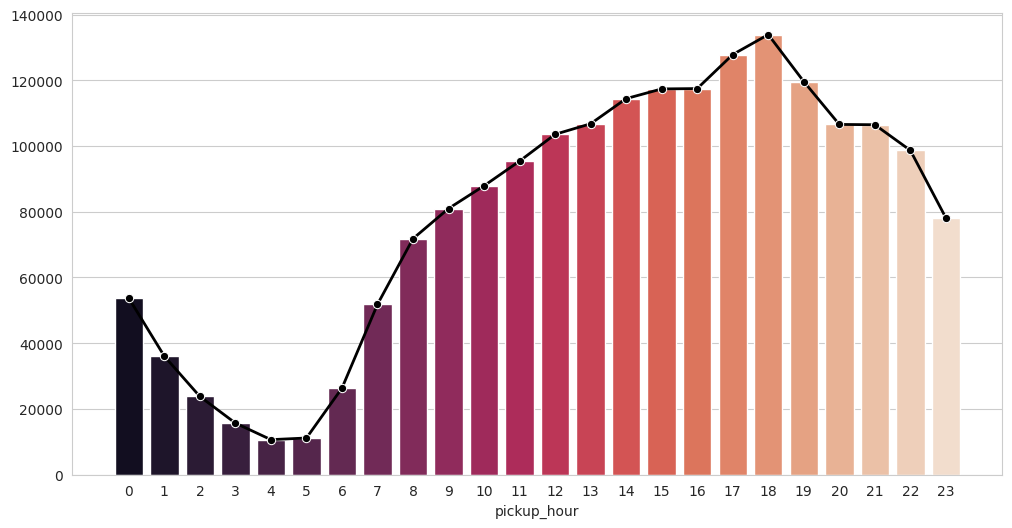

In [119]:
# Find and show the hourly trends in taxi pickups

df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
hourly_pickups = df.groupby("pickup_hour").size()

# Plotting the hourly trends
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="rocket")
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, color='black', marker='o', linewidth=2)

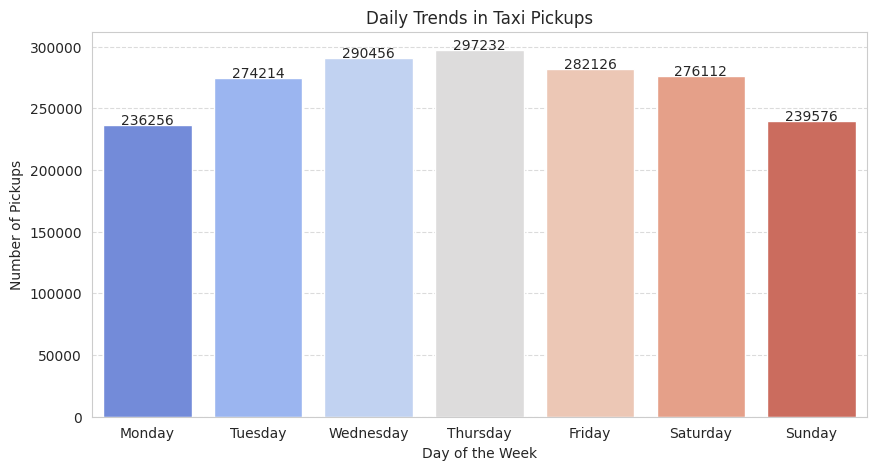

In [120]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.dayofweek

# Define day labels
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group by day and count pickups
daily_pickups = df.groupby('pickup_day').size()

# Plot the daily trends
plt.figure(figsize=(10, 5))
sns.barplot(x=days, y=daily_pickups.values, palette="coolwarm")

# Labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.title('Daily Trends in Taxi Pickups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the values on top of bars
for i, val in enumerate(daily_pickups):
    plt.text(i, val + 500, str(val), ha='center', fontsize=10)

plt.show()

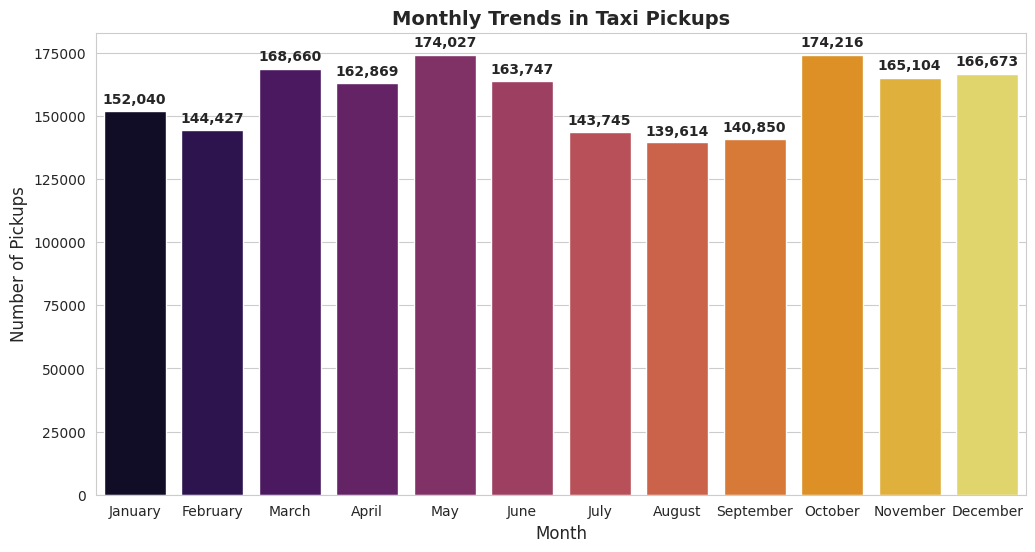

In [121]:
# Show the monthly trends in pickups

df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month

# Count pickups per month
monthly_pickups = df['pickup_month'].value_counts().sort_index()

# Plot the monthly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="inferno")

# Add labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.title("Monthly Trends in Taxi Pickups", fontsize=14, fontweight='bold')

# Correct x-axis labels
plt.xticks(ticks=range(12), labels=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
], fontsize=10)

# Show values on top of bars
for i, val in enumerate(monthly_pickups.values):
    plt.text(i, val * 1.02, f"{val:,}", ha='center', fontsize=10, fontweight='bold')

plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [123]:
# Analyse the above parameters

financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero values
zero_counts = (df[financial_columns] == 0).sum()

# Count negative values
negative_counts = (df[financial_columns] < 0).sum()

# Display results
print("Zero Values in Financial Columns:")
print(zero_counts)
print("\nNegative Values in Financial Columns:")
print(negative_counts)


Zero Values in Financial Columns:
fare_amount           0
tip_amount       435593
total_amount         82
trip_distance     37362
dtype: int64

Negative Values in Financial Columns:
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [124]:
# Create a df with non zero entries for the selected parameters.

filter_columns = ["fare_amount", "total_amount", "trip_distance"]

# Count zero values before filtering
zero_counts_before = (df[filter_columns] == 0).sum()
print("Zero Values Before Filtering:")
print(zero_counts_before)

# Remove rows where fare_amount or total_amount is zero
filtered_taxi_data = df[
    (df["fare_amount"] > 0) &
    (df["total_amount"] > 0)
]

# Handling trip_distance:
#Keep zero distances if fare > 0 (Uncomment to use this instead)
filtered_taxi_data = filtered_taxi_data[(filtered_taxi_data["trip_distance"] > 0) | (filtered_taxi_data["fare_amount"] > 0)]

# Count zero values after filtering
zero_counts_after = (filtered_taxi_data[filter_columns] == 0).sum()
print("\nZero Values After Filtering:")
print(zero_counts_after)

Zero Values Before Filtering:
fare_amount          0
total_amount        82
trip_distance    37362
dtype: int64

Zero Values After Filtering:
fare_amount          0
total_amount         0
trip_distance    37362
dtype: int64


In [125]:
filtered_taxi_data[(filtered_taxi_data[filter_columns] == 0).any(axis=1)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
226             2  2023-09-01 02:58:39   2023-09-01 02:58:50              1.0   
251             1  2023-09-01 02:29:04   2023-09-01 02:45:34              1.0   
304             2  2023-09-01 04:36:41   2023-09-01 04:36:59              1.0   
309             1  2023-09-01 04:49:35   2023-09-01 04:49:53              1.0   
311             1  2023-09-01 05:41:17   2023-09-01 05:51:07              1.0   
...           ...                  ...                   ...              ...   
1896315         1  2023-11-30 23:39:40   2023-11-30 23:48:35              1.0   
1896356         1  2023-11-30 23:37:11   2023-11-30 23:58:18              1.0   
1896372         1  2023-11-30 23:57:11   2023-12-01 00:07:19              1.0   
1896376         1  2023-11-30 23:49:26   2023-11-30 23:56:00              1.0   
1896395         1  2023-11-30 23:01:23   2023-11-30 23:14:15              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
226                0.0         5.0                  N           211   
251                0.0         1.0                  N            79   
304                0.0         1.0                  N           246   
309                0.0         1.0                  N            70   
311                0.0         1.0                  N           143   
...                ...         ...                ...           ...   
1896315            0.0         1.0                  N            79   
1896356            0.0         1.0                  N           230   
1896372            0.0         1.0                  N           114   
1896376            0.0         1.0                  N           114   
1896395            0.0         1.0                  N           163   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
226               211             1  ...      0.0        4.70           0.0   
251                48             1  ...      0.5        0.00           0.0   
304               246             1  ...      0.5        4.38           0.0   
309                70             3  ...      0.5        0.00           0.0   
311                75             1  ...      0.5        0.00           0.0   
...               ...           ...  ...      ...         ...           ...   
1896315           170             1  ...      0.5        0.00           0.0   
1896356           148             1  ...      0.5        0.00           0.0   
1896372           100             1  ...      0.5        0.00           0.0   
1896376           148             1  ...      0.5        0.00           0.0   
1896395           238             1  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
226                        1.0         28.20                   2.5   
251                        1.0         23.85                   2.5   
304                        1.0         26.27                   2.5   
309                        1.0          5.50                   0.0   
311                        1.0         18.53                   2.5   
...                        ...           ...                   ...   
1896315                    1.0         15.62                   2.5   
1896356                    1.0         34.79                   2.5   
1896372                    1.0         19.30                   2.5   
1896376                    1.0         22.20                   2.5   
1896395                    1.0         22.73                   2.5   

         Airport_fee  pickup_hour  pickup_day  pickup_month  
226              0.0            2           4             9  
251              NaN            2           4             9  
304              NaN            4           4             9  
309              0.0            4           4             9  
311              NaN            5           4             9  
...              ... 

In [126]:
filtered_taxi_data = filtered_taxi_data[~((filtered_taxi_data["trip_distance"] == 0) & (filtered_taxi_data["PULocationID"] != filtered_taxi_data["DOLocationID"]))]

In [127]:
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero values
(filtered_taxi_data[financial_columns] == 0).sum()

fare_amount           0
tip_amount       417440
total_amount          0
trip_distance     15613
dtype: int64

In [128]:
filtered_taxi_data.shape

(1874136, 22)

In [129]:
filtered_taxi_data.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.874136e+06     1.874136e+06   1.874136e+06  1.874136e+06   
mean   1.739650e+00     1.375599e+00   3.484679e+00  1.071040e+00   
std    4.441915e-01     8.674196e-01   4.543897e+00  3.820374e-01   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.080000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.800000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.440000e+00  1.000000e+00   
max    6.000000e+00     6.000000e+00   2.048600e+02  6.000000e+00   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.874136e+06  1.874136e+06  1.874136e+06  1.874136e+06  1.874136e+06   
mean   1.653866e+02  1.641143e+02  1.198830e+00  1.988558e+01  1.602561e+00   
std    6.391174e+01  6.976035e+01  4.600028e-01  1.061270e+02  1.831360e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e-02  0.000000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00   
75%    2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05  1.425000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.874136e+06  1.874136e+06  1.874136e+06           1.874136e+06   
mean   4.955795e-01  3.578550e+00  5.973570e-01           9.994435e-01   
std    4.711924e-02  4.052609e+00  2.187095e+00           2.035168e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.860000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  4.470000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  2.230800e+02  9.500000e+01           1.000000e+00   

       total_amount  congestion_surcharge   Airport_fee   pickup_hour  \
count  1.874136e+06          1.874136e+06  1.823392e+06  1.874136e+06   
mean   2.899264e+01          2.317542e+00  1.432446e-01  1.427204e+01   
std    1.070075e+02          6.502729e-01  4.653403e-01  5.796465e+00   
min    1.000000e+00          0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.596000e+01          2.500000e+00  0.000000e+00  1.100000e+01   
50%    2.100000e+01          2.500000e+00  0.000000e+00  1.500000e+01   
75%    3.090000e+01          2.500000e+00  0.000000e+00  1.900000e+01   
max    1.431675e+05          2.500000e+00  1.750000e+00  2.300000e+01   

         pickup_day  pickup_month  
count  1.874136e+06  1.874136e+06  
mean   3.000621e+00  6.520428e+00  
std    1.928859e+00  3.464920e+00  
min    0.000000e+00  1.000000e+00  
25%    1.000000e+00  4.000000e+00  
50%    3.000000e+00  6.000000e+00  
75%    5.000000e+00  1.000000e+01  
max    6.000000e+00  1.200000e+01

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

pickup_month
1     4130516.94
2     3913475.62
3     4723329.61
4     4653398.33
5     5081347.93
6     4779934.24
7     4144783.43
8     4039168.82
9     4286129.36
10    5065486.80
11    4718430.26
12    4800151.94
Name: total_amount, dtype: float64


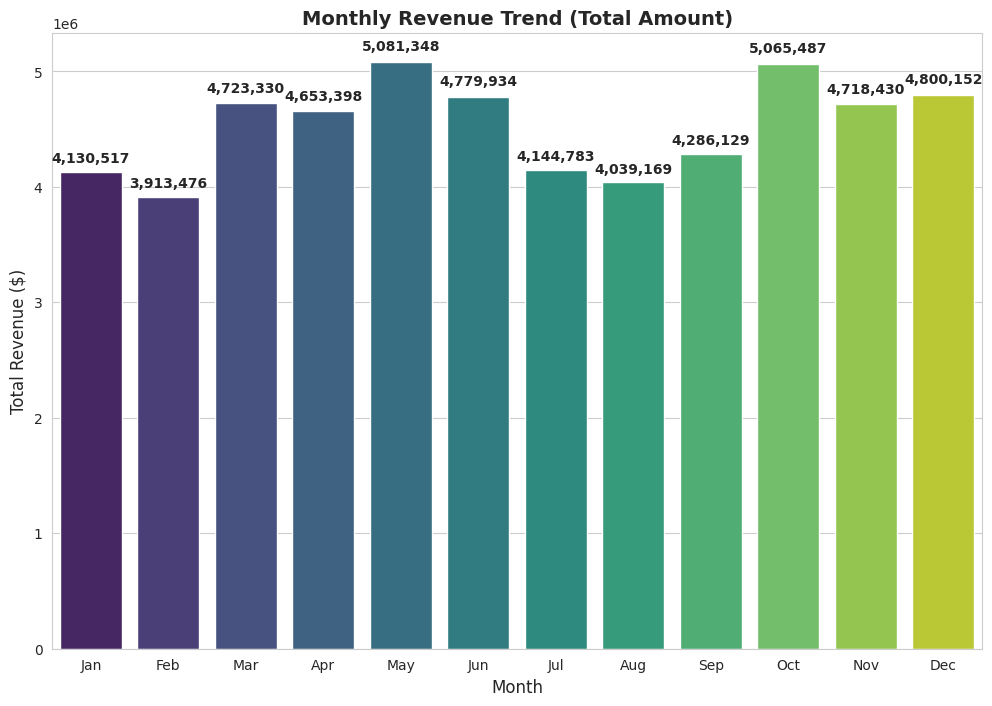

In [130]:
# Group data by month and analyse monthly revenue

monthly_revenue = filtered_taxi_data.groupby('pickup_month')['total_amount'].sum().sort_index()
print(monthly_revenue)
# Plot the revenue trend
plt.figure(figsize=(12, 8))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="viridis", order=range(1, 13))

# Add labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.title("Monthly Revenue Trend (Total Amount)", fontsize=14, fontweight='bold')

# Format x-axis labels
plt.xticks(ticks=range(12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], fontsize=10)

# Show values on top of bars
for i, val in enumerate(monthly_revenue.values):
    plt.text(i, val * 1.02, f"{val:,.0f}", ha='center', fontsize=10, fontweight='bold')

plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

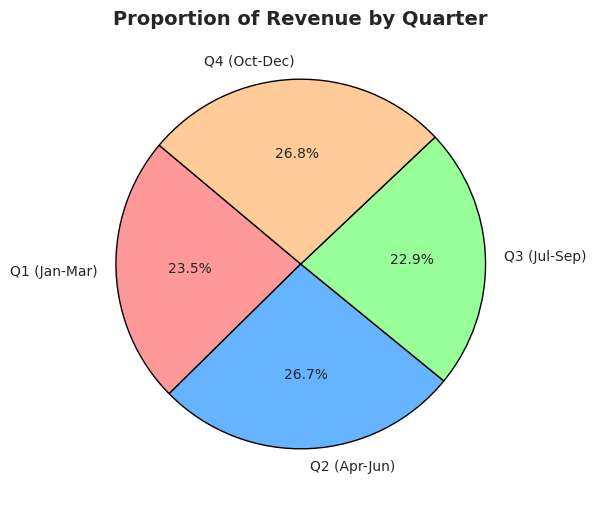

In [131]:
# Calculate proportion of each quarter

filtered_taxi_data['quarter'] = pd.to_datetime(filtered_taxi_data['tpep_pickup_datetime']).dt.quarter
quarterly_revenue = filtered_taxi_data.groupby('quarter')['total_amount'].sum()

# Define Labels and Colors
labels = ["Q1 (Jan-Mar)", "Q2 (Apr-Jun)", "Q3 (Jul-Sep)", "Q4 (Oct-Dec)"]

# Plot the Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(quarterly_revenue, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], startangle=140, wedgeprops={'edgecolor': 'black'})

# Title and Show
plt.title("Proportion of Revenue by Quarter", fontsize=14, fontweight='bold')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip_distance and fare_amount: 0.1578


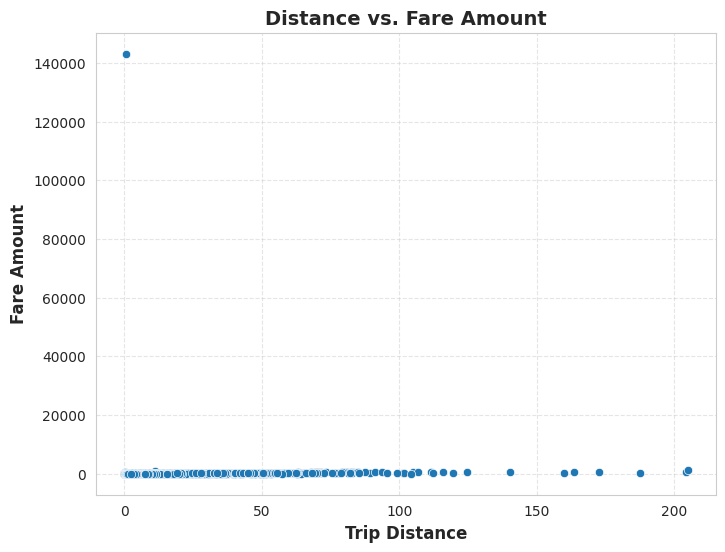

In [132]:
# Show how trip fare is affected by distance

# Step 1: Filter out invalid distances
filtered_df = filtered_taxi_data[filtered_taxi_data['trip_distance'] > 0]

# Step 2: Compute correlation
correlation = filtered_df["trip_distance"].corr(filtered_df["fare_amount"])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")

# Step 3: Create the figure
plt.figure(figsize=(8, 6))

# Step 4: Scatter plot with transparency for clarity
sns.scatterplot(
    x="trip_distance",
    y="fare_amount",
    data=filtered_df,
)
# Step 6: Customize labels and titles
plt.xlabel("Trip Distance", fontsize=12, fontweight='bold')
plt.ylabel("Fare Amount", fontsize=12, fontweight='bold')
plt.title("Distance vs. Fare Amount", fontsize=14, fontweight='bold')

# Step 7: Grid and Adjust Layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [133]:
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors

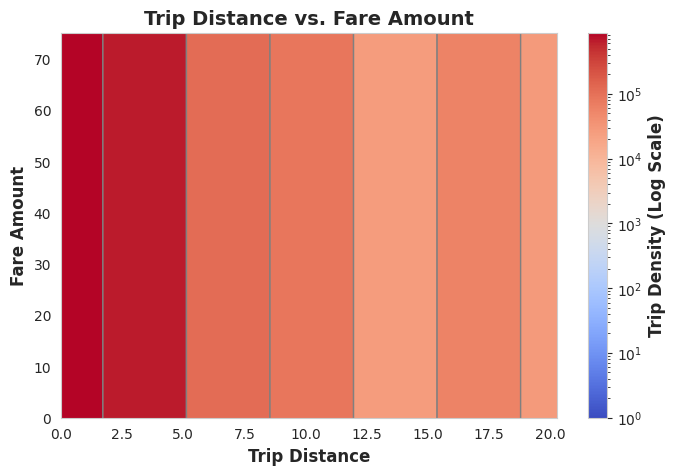

In [134]:
plt.figure(figsize=(8, 5))

hb = plt.hexbin(
    filtered_df["trip_distance"],
    filtered_df["fare_amount"],
    gridsize=60,  # Increase for better detail
    cmap="coolwarm",  # More readable colors
    mincnt=1,  # Avoid empty bins
    edgecolors="gray",  # Improve hexagon visibility
  norm=mcolors.LogNorm()  # Log scale for density visibility
)

# Step 2: Add color bar
cb = plt.colorbar(hb, label="Density of Trips")
cb.set_label("Trip Density (Log Scale)", fontsize=12, fontweight="bold")

# Step 3: Customize axes and title
plt.xlabel("Trip Distance", fontsize=12, fontweight="bold")
plt.ylabel("Fare Amount", fontsize=12, fontweight="bold")
plt.title("Trip Distance vs. Fare Amount", fontsize=14, fontweight="bold")

# Step 4: Limit outliers
plt.xlim(0, filtered_df["trip_distance"].quantile(0.99))
plt.ylim(0, filtered_df["fare_amount"].quantile(0.99))

# Step 5: Add light grid
plt.grid(alpha=0.3)

# Step 6: Show the plot
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between trip_duration and fare_amount: 0.05


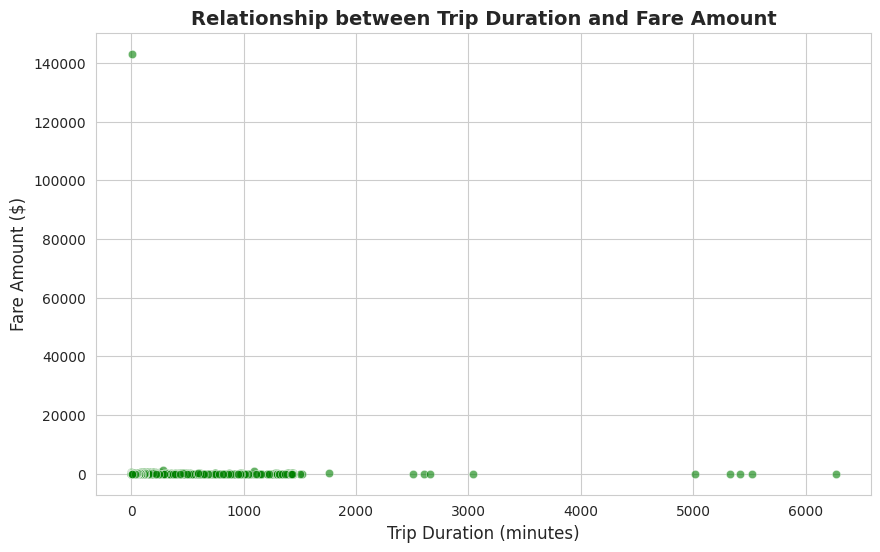

In [135]:
# Show relationship between fare and trip duration

filtered_taxi_data['tpep_pickup_datetime'] = pd.to_datetime(filtered_taxi_data['tpep_pickup_datetime'])
filtered_taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(filtered_taxi_data['tpep_dropoff_datetime'])
filtered_taxi_data['trip_duration'] = (filtered_taxi_data['tpep_dropoff_datetime'] - filtered_taxi_data['tpep_pickup_datetime']).dt.total_seconds() /60 # Convert to minutes

# Filter out rows with zero or negative duration (if any)
filtered_df = filtered_taxi_data[filtered_taxi_data['trip_duration'] > 0]

# Calculate the correlation coefficient between trip_duration and fare_amount
correlation = filtered_df['trip_duration'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip_duration and fare_amount: {correlation:.2f}")

# Plot the scatter plot between fare amount and trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df['trip_duration'], y=filtered_df['fare_amount'], color='green', alpha=0.6)

# Add labels and title
plt.xlabel("Trip Duration (minutes)", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.title("Relationship between Trip Duration and Fare Amount", fontsize=14, fontweight='bold')
# Show the plot
plt.show()

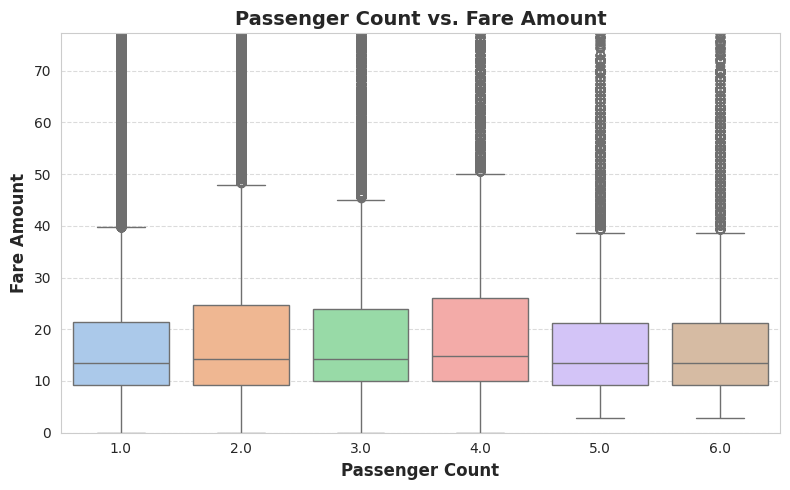

In [136]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(8, 5))

ax = sns.boxplot(
    data=filtered_taxi_data,
    x='passenger_count',
    y='fare_amount',
    palette="pastel",
    showfliers=True
)
plt.ylim(0, filtered_taxi_data["fare_amount"].quantile(0.99))

# Add title and labels
plt.title("Passenger Count vs. Fare Amount", fontsize=14, fontweight='bold')
plt.xlabel("Passenger Count", fontsize=12, fontweight='bold')
plt.ylabel("Fare Amount", fontsize=12, fontweight='bold')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

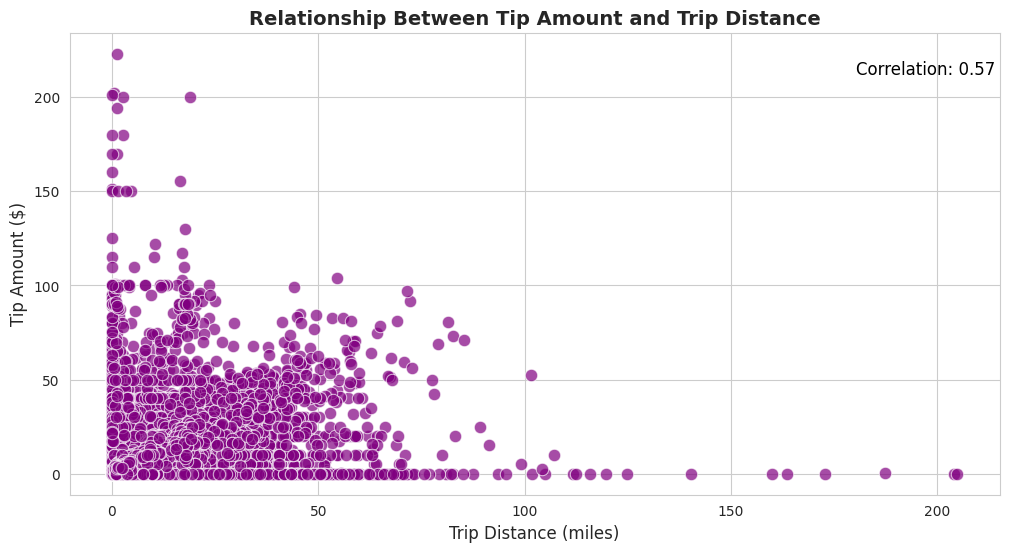

In [137]:
# Show relationship between tip and trip distance

plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=filtered_taxi_data, color='purple', s=80, alpha=0.7)

# Add labels and title
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.title('Relationship Between Tip Amount and Trip Distance', fontsize=14, fontweight='bold')

# Display correlation value
correlation = filtered_taxi_data['trip_distance'].corr(filtered_taxi_data['tip_amount'])
plt.figtext(0.78, 0.81, f'Correlation: {correlation:.2f}', fontsize=12, color='black')

plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [138]:
# Analyse the distribution of different payment types (payment_type).

payment_type_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}
filtered_taxi_data['payment_type'] = filtered_taxi_data['payment_type'].map(payment_type_mapping)
payment_counts = filtered_taxi_data['payment_type'].value_counts()
payment_percentage = filtered_taxi_data['payment_type'].value_counts(normalize=True) * 100
payment_counts

payment_type
Credit Card    1537089
Cash            314885
Dispute          13426
No Charge         8736
Name: count, dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



In [139]:
payment_percentage

payment_type
Credit Card    82.015873
Cash           16.801609
Dispute         0.716383
No Charge       0.466135
Name: proportion, dtype: float64

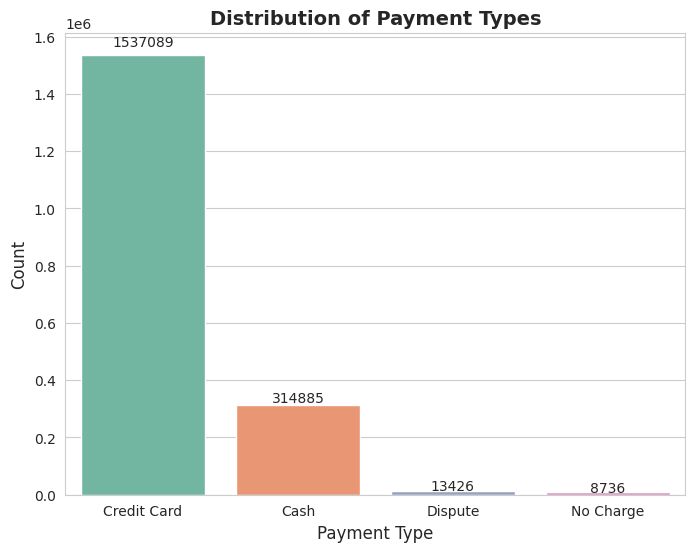

In [140]:
# Count the occurrences of each payment type
payment_type_counts = filtered_taxi_data['payment_type'].value_counts()

# Plot the distribution of payment types
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='Set2')

# Add labels and title
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Payment Types', fontsize=14, fontweight='bold')

# Show values on top of bars
for i, val in enumerate(payment_type_counts.values):
    plt.text(i, val * 1.02, str(val), ha='center', fontsize=10)

plt.show()

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [146]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/NYCAssignment/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


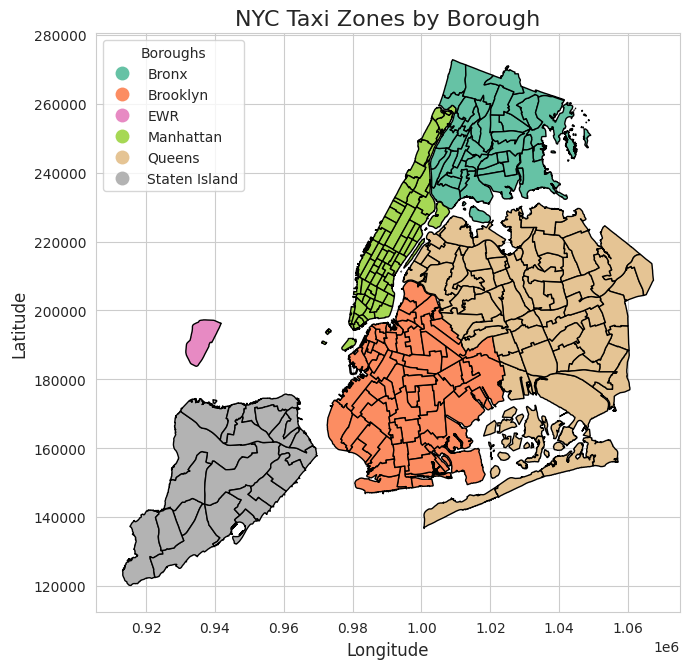

In [147]:
# print(zones.info())
# zones.plot()

print(zones.info())
fig, ax = plt.subplots(figsize=(7, 7))

zones.plot(
    column="borough",
    cmap="Set2",
    edgecolor="black",
    legend=True,
    ax=ax,
    legend_kwds={
        'loc': 'upper left',
        'bbox_to_anchor': (0, 1),
        'title': 'Boroughs'
    }
)

ax.set_title("NYC Taxi Zones by Borough", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

plt.tight_layout()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [148]:
# Merge zones and trip records using locationID and PULocationID

taxi_data_zones_merged = filtered_taxi_data.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

# Check the merged DataFrame
taxi_data_zones_merged.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              1.0   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.71         1.0                  N           113           238   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

  payment_type  ...  pickup_month  quarter  trip_duration  OBJECTID  \
0  Credit Card  ...             9        3      20.483333     113.0   
1         Cash  ...             9        3       2.483333     142.0   
2  Credit Card  ...             9        3      44.583333     132.0   
3      Dispute  ...             9        3      38.116667     249.0   
4  Credit Card  ...             9        3       6.300000     144.0   

   Shape_Leng  Shape_Area                     zone  LocationID    borough  \
0    0.032745    0.000058  Greenwich Village North       113.0  Manhattan   
1    0.038176    0.000076      Lincoln Square East       142.0  Manhattan   
2    0.245479    0.002038              JFK Airport       132.0     Queens   
3    0.036384    0.000072             West Village       249.0  Manhattan   
4    0.027620    0.000047      Little Italy/NoLiTa       144.0  Manhattan   

                                            geometry  
0  POLYGON ((986643.64 204346.324, 986592.535 204...  
1  POLYGON ((989380.305 218980.247, 989359.803 21...  
2  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
3  POLYGON ((983555.319 204876.901, 983469.158 20...  
4  POLYGON ((985411.76 200369.518, 985342.573 200...  

[5 rows x 31 columns]

In [149]:
taxi_data_zones_merged.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag           0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
Airport_fee              50749
pickup_hour                  0
pickup_day                   0
pickup_month                 0
quarter                      0
trip_duration                0
OBJECTID                 18932
Shape_Leng               18932
Shape_Area               18932
zone                     18932
LocationID               18932
borough                  18932
geometry                 18932
dtype: int64

In [150]:
taxi_data_zones_merged = taxi_data_zones_merged.dropna(subset=["zone"])

In [151]:
taxi_data_zones_merged.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag           0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
Airport_fee              50208
pickup_hour                  0
pickup_day                   0
pickup_month                 0
quarter                      0
trip_duration                0
OBJECTID                     0
Shape_Leng                   0
Shape_Area                   0
zone                         0
LocationID                   0
borough                      0
geometry                     0
dtype: int64

In [152]:
taxi_data_zones_merged.shape

(1855321, 31)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [153]:
# Group data by location and calculate the number of trips

trips_per_location = taxi_data_zones_merged.groupby("PULocationID").size().reset_index(name="num_trips")

# Merge with taxi_data_zones_merged to get zone names
trips_per_location = trips_per_location.merge(
    taxi_data_zones_merged[["PULocationID", "zone"]].drop_duplicates(),
    on="PULocationID",
    how="left"
)

# Sort by most popular locations
trips_per_location = trips_per_location.sort_values(by="num_trips", ascending=False)

# Display the top 10 locations with zone names
trips_per_location[['PULocationID','zone','num_trips']].head(10)

PULocationID                          zone  num_trips
124           132                   JFK Airport      96722
228           237         Upper East Side South      88171
153           161                Midtown Center      86928
227           236         Upper East Side North      79182
154           162                  Midtown East      66347
130           138             LaGuardia Airport      64331
177           186  Penn Station/Madison Sq West      63914
221           230     Times Sq/Theatre District      62138
134           142           Lincoln Square East      62064
162           170                   Murray Hill      55426

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [154]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trips_per_location, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values (for locations with no trips) with 0
zones["num_trips"] = zones["num_trips"].fillna(0)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                   zone_x  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  num_trips                   zone_y  
0           1.0      203.0           Newark Airport  
1           2.0        2.0              Jamaica Bay  
2           3.0       35.0  Allerton/Pelham Gardens  
3           4.0     2238.0            Alphabet City  
4           5.0       10.0            Arden Heights

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

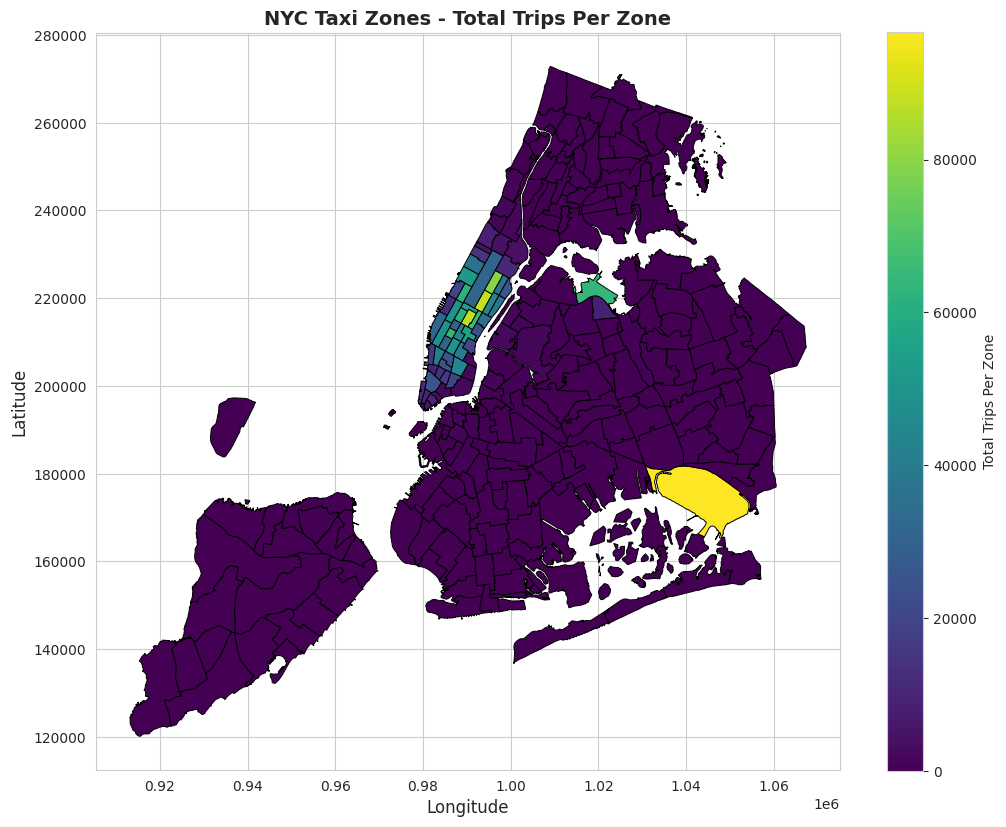

In [155]:
# Define figure and axis
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 20))

# Plot NYC taxi zones colored by the number of trips
zones.sort_values(by="num_trips", ascending=False).plot(column="num_trips", cmap="viridis", edgecolor="black", linewidth=0.7,
           legend=True, ax=ax,
       legend_kwds={'label': "Total Trips Per Zone", 'orientation': "vertical",'shrink': 0.48})

# Title and labels
plt.title("NYC Taxi Zones - Total Trips Per Zone", fontsize=14, fontweight='bold')
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Show plot
plt.show()



In [156]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by="num_trips", ascending=False)
zones_sorted[["LocationID", "borough", "zone_x", "num_trips"]].head(10)

LocationID    borough                        zone_x  num_trips
131         132     Queens                   JFK Airport    96722.0
236         237  Manhattan         Upper East Side South    88171.0
160         161  Manhattan                Midtown Center    86928.0
235         236  Manhattan         Upper East Side North    79182.0
161         162  Manhattan                  Midtown East    66347.0
137         138     Queens             LaGuardia Airport    64331.0
185         186  Manhattan  Penn Station/Madison Sq West    63914.0
229         230  Manhattan     Times Sq/Theatre District    62138.0
141         142  Manhattan           Lincoln Square East    62064.0
169         170  Manhattan                   Murray Hill    55426.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [157]:
# Find routes which have the slowest speeds at different times of the day

# Assume df_filtered contains pickup and dropoff details with timestamps
# Filter out rows where trip duration or speed is negative
taxi_data_zones_merged['trip_duration_hours'] = (taxi_data_zones_merged['tpep_dropoff_datetime'] -
                                             taxi_data_zones_merged['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_filtered_clean = taxi_data_zones_merged[(taxi_data_zones_merged["trip_duration_hours"] > 0) & (taxi_data_zones_merged["trip_distance"] > 0)]

# Group by route and hour again with cleaned data
route_speed_clean = df_filtered_clean.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_duration=("trip_duration_hours", "mean"),  # Average trip duration per route-hour
    total_distance=("trip_distance", "mean")  # Total distance per route-hour
).reset_index()

# Compute speed (distance / avg duration)
route_speed_clean["avg_speed"] = route_speed_clean["total_distance"] / (route_speed_clean["avg_duration"] + 1e-5)  # Avoid division by zero

# Find the slowest routes (smallest speed)
slowest_routes_clean = route_speed_clean.sort_values(by="avg_speed", ascending=True).head(10)  # Adjust for top N slowest routes

# Display the cleaned slowest routes
slowest_routes_clean

PULocationID  DOLocationID  pickup_hour  avg_duration  total_distance  \
107342           232            65           13     92.040556        0.490000   
120351           243           264           17     23.159167        0.180000   
9270              43            10           10      0.899444        0.020000   
126355           258           258            1      0.762500        0.020000   
36015            100             7            8      5.573889        0.220000   
7411              40            65           21     23.907222        1.120000   
42376            113           235           22      5.820556        0.280000   
64559            142           142            5     11.801389        0.575000   
93660            194           194           16      0.204444        0.010000   
100108           226           145           18     30.179352        1.563333   

        avg_speed  
107342   0.005324  
120351   0.007772  
9270     0.022236  
126355   0.026229  
36015    0.039470  
7411     0.046848  
42376    0.048105  
64559    0.048723  
93660    0.048911  
100108   0.051801

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

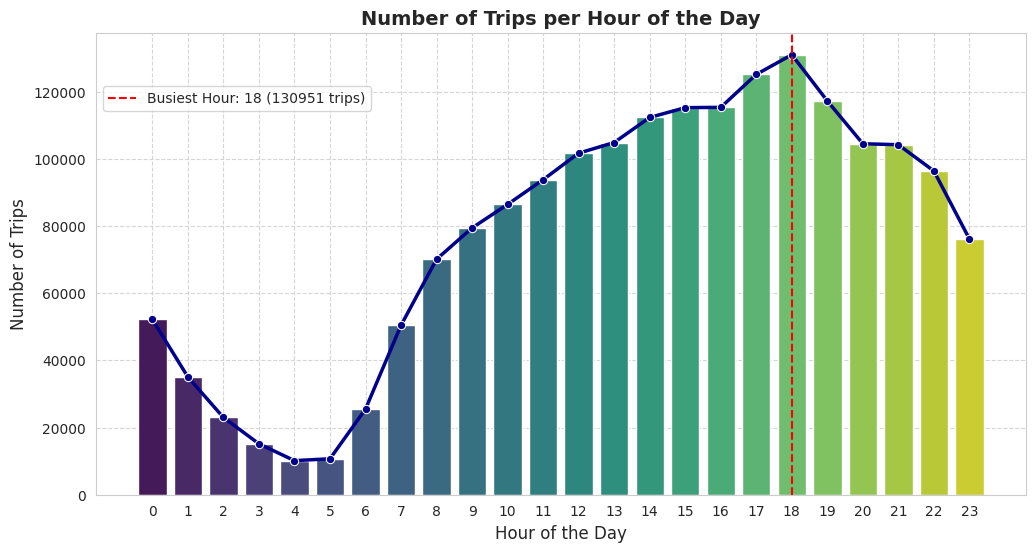

In [158]:
# Visualise the number of trips per hour and find the busiest hour

trips_per_hour = taxi_data_zones_merged.groupby('pickup_hour').size()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()  # Hour with max trips
busiest_hour_trips = trips_per_hour.max()  # Number of trips in that hour

# Create the figure
plt.figure(figsize=(12, 6))

# Bar plot for the number of trips per hour
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')

# Line plot to show the trend
sns.lineplot(x=trips_per_hour.index, y=trips_per_hour.values, color="darkblue", marker="o",markersize=6, linewidth=2.5)

# Highlight the busiest hour with a vertical line
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour} ({busiest_hour_trips} trips)')

# Add labels and title
plt.title('Number of Trips per Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.8)
# Show the legend
plt.legend(loc="upper left", bbox_to_anchor=(0, 0.9), fontsize=10)

# Show the plot
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [159]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# Calculate the number of trips per hour
trip_count_per_hour = taxi_data_zones_merged.groupby('pickup_hour').size().reset_index(name='trip_count')

# Scale up the number of trips using the sampling fraction
sample_fraction = 0.008  # Replace this with your actual sampling fraction
trip_count_per_hour['actual_trip_count'] = (trip_count_per_hour['trip_count'] / sample_fraction).astype(int)

# Find the five busiest hours
top_5_hours = trip_count_per_hour.nlargest(5, 'trip_count')

# Display results
top_5_hours



pickup_hour  trip_count  actual_trip_count
18           18      130951           16368875
17           17      125090           15636250
19           19      117187           14648375
16           16      115289           14411125
15           15      115198           14399750

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [160]:
# Compare traffic trends for the week days and weekends
taxi_data_zones_merged.columns.tolist()


['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month',
 'quarter',
 'trip_duration',
 'OBJECTID',
 'Shape_Leng',
 'Shape_Area',
 'zone',
 'LocationID',
 'borough',
 'geometry',
 'trip_duration_hours']

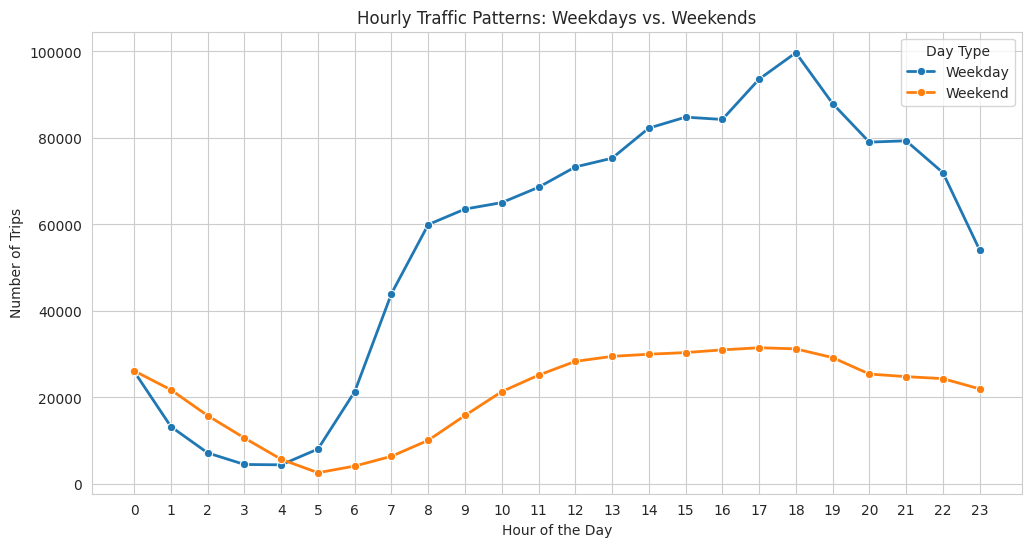

In [161]:
# Compare traffic trends for the week days and weekends
import matplotlib.pyplot as plt
import seaborn as sns

# Separate weekdays and weekends (Weekdays: 0-4, Weekends: 5-6)
weekdays = taxi_data_zones_merged[taxi_data_zones_merged['pickup_day'] <= 4]
weekends = taxi_data_zones_merged[taxi_data_zones_merged['pickup_day'] >= 5]

# Count the number of trips per hour for weekdays and weekends
weekday_counts = weekdays.groupby('pickup_hour').size()
weekend_counts = weekends.groupby('pickup_hour').size()

# Plot the data in one figure
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
# Weekday plot
sns.lineplot(x=weekday_counts.index, y=weekday_counts.values, marker='o', label="Weekday", linewidth=2)

# Weekend plot
sns.lineplot(x=weekend_counts.index, y=weekend_counts.values, marker='o', label="Weekend", linewidth=2)

# Titles and labels
plt.title("Hourly Traffic Patterns: Weekdays vs. Weekends")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))

# Legend
plt.legend(title="Day Type")

# Show the plot
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

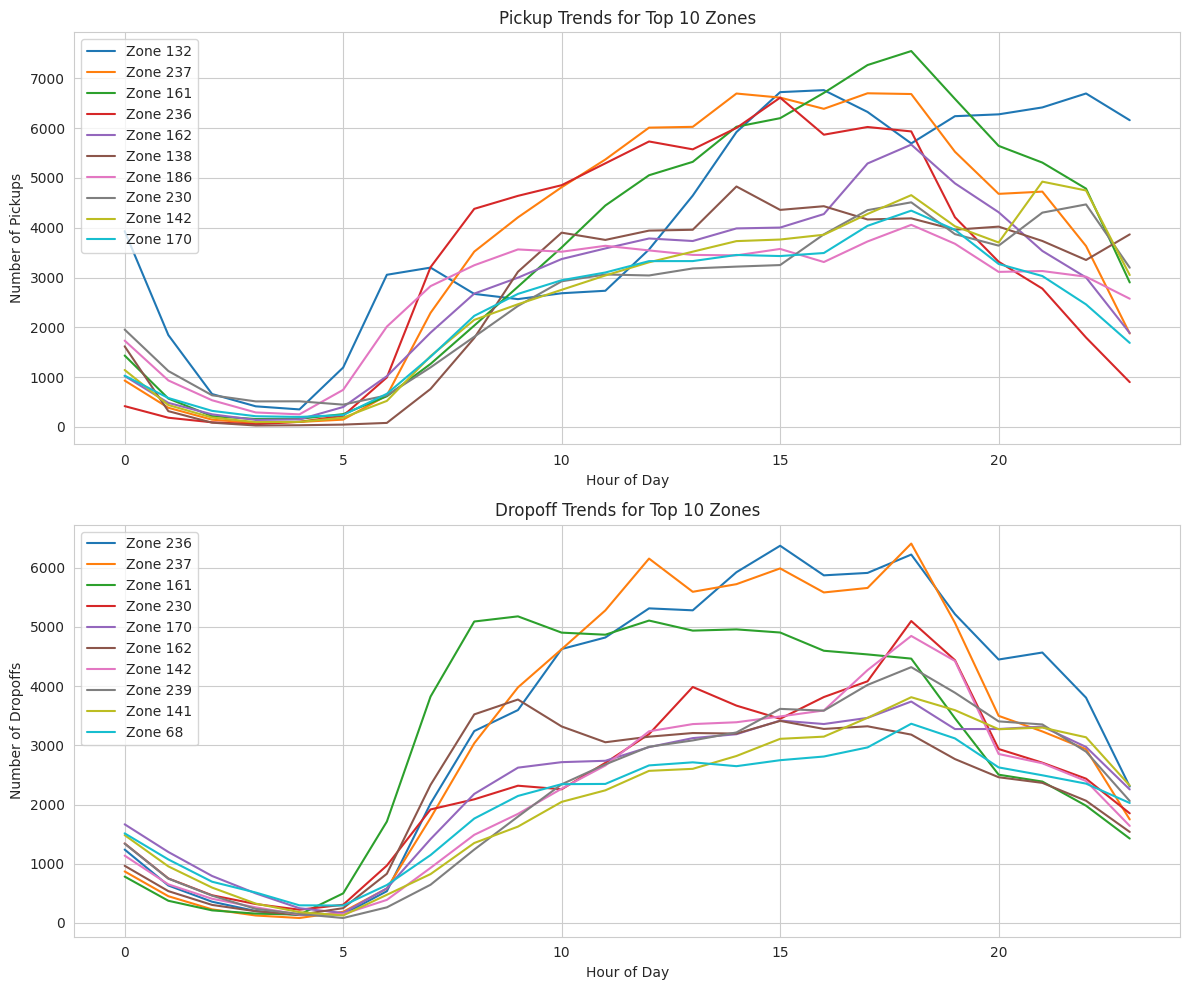

In [162]:
# Group by Pickup Hour and PULocationID
pickup_counts = taxi_data_zones_merged.groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='pickup_count')
taxi_data_zones_merged['dropoff_hour'] = pd.to_datetime(taxi_data_zones_merged['tpep_dropoff_datetime']).dt.hour
# Group by Dropoff Hour and DOLocationID
dropoff_counts = taxi_data_zones_merged.groupby(['dropoff_hour', 'DOLocationID']).size().reset_index(name='dropoff_count')

# Find top 10 pickup zones by total pickups
top_pickup_zones = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index

# Find top 10 dropoff zones by total dropoffs
top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index

# Filter data for these top zones
pickup_top_zones = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]
dropoff_top_zones = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]

# Plot the pickup and dropoff trends for top 10 zones
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Pickup Trends for Top 10 Zones
for zone in top_pickup_zones:
    zone_data = pickup_top_zones[pickup_top_zones['PULocationID'] == zone]
    ax[0].plot(zone_data['pickup_hour'], zone_data['pickup_count'], label=f'Zone {zone}')

ax[0].set_title('Pickup Trends for Top 10 Zones')
ax[0].set_xlabel('Hour of Day')
ax[0].set_ylabel('Number of Pickups')
ax[0].legend(loc='upper left')

# Dropoff Trends for Top 10 Zones
for zone in top_dropoff_zones:
    zone_data = dropoff_top_zones[dropoff_top_zones['DOLocationID'] == zone]
    ax[1].plot(zone_data['dropoff_hour'], zone_data['dropoff_count'], label=f'Zone {zone}')

ax[1].set_title('Dropoff Trends for Top 10 Zones')
ax[1].set_xlabel('Hour of Day')
ax[1].set_ylabel('Number of Dropoffs')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [163]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Calculate total pickups per zone
pickup_total = pickup_counts.groupby('PULocationID')['pickup_count'].sum()

# Calculate total dropoffs per zone
dropoff_total = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum()

# Combine pickup and dropoff data for each zone into a single DataFrame
zone_data = pd.DataFrame({'total_pickups': pickup_total, 'total_dropoffs': dropoff_total})

# Fill missing values with 0 (zones with only pickups or only dropoffs)
zone_data.fillna(0, inplace=True)

# Avoid division by zero (replace 0 dropoffs with a small number)
zone_data['total_dropoffs'] = zone_data['total_dropoffs'].replace(0, 1)

# Calculate the pickup to dropoff ratio for each zone
zone_data['pickup_dropoff_ratio'] = zone_data['total_pickups'] / zone_data['total_dropoffs']

# Sort by pickup/dropoff ratio (high to low)
top_10_ratios = zone_data.sort_values('pickup_dropoff_ratio', ascending=False).head(10)

# Sort by pickup/dropoff ratio (low to high)
bottom_10_ratios = zone_data.sort_values('pickup_dropoff_ratio', ascending=True).head(10)

# Display the top 10 and bottom 10 pickup/dropoff ratios
print("Top 10 Zones with the Highest Pickup/Dropoff Ratios:")
top_10_ratios



Top 10 Zones with the Highest Pickup/Dropoff Ratios:


total_pickups  total_dropoffs  pickup_dropoff_ratio
70          8346.0           983.0              8.490336
132        96722.0         22544.0              4.290366
138        64331.0         24371.0              2.639654
199            2.0             1.0              2.000000
186        63914.0         40773.0              1.567557
114        24779.0         17990.0              1.377376
43         31137.0         22691.0              1.372218
249        41395.0         31068.0              1.332400
162        66347.0         53163.0              1.247992
100        30547.0         25641.0              1.191334

In [164]:
print("\nTop 10 Zones with the Lowest Pickup/Dropoff Ratios:")
bottom_10_ratios


Top 10 Zones with the Lowest Pickup/Dropoff Ratios:


total_pickups  total_dropoffs  pickup_dropoff_ratio
265            0.0          7069.0              0.000000
264            0.0          4178.0              0.000000
30             0.0            18.0              0.000000
176            0.0            12.0              0.000000
99             0.0             3.0              0.000000
57             0.0            28.0              0.000000
27             1.0            37.0              0.027027
221            1.0            35.0              0.028571
245            1.0            31.0              0.032258
1            203.0          5682.0              0.035727

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [165]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter for night hours (11 PM to 5 AM)
night_hours = taxi_data_zones_merged[(taxi_data_zones_merged['pickup_hour'] >= 23) | (taxi_data_zones_merged['pickup_hour'] <= 5)]

# Group by PULocationID for pickups and DOLocationID for dropoffs
pickup_night_counts = night_hours.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_night_counts = night_hours.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge with taxi zone lookup to get zone names
pickup_night_counts = pickup_night_counts.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
dropoff_night_counts = dropoff_night_counts.merge(zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Sort to get the top 10 zones
top_pickup_zones_night = pickup_night_counts.sort_values(by='pickup_count', ascending=False).head(10)
top_dropoff_zones_night = dropoff_night_counts.sort_values(by='dropoff_count', ascending=False).head(10)

# Select only relevant columns for display
top_pickup_zones_night = top_pickup_zones_night.rename(columns={'zone_x': 'Zone', 'PULocationID_x': 'PULocationID'})
top_dropoff_zones_night = top_dropoff_zones_night.rename(columns={'zone_x': 'Zone', 'DOLocationID': 'DOLocationID'})
top_pickup_zones_night = top_pickup_zones_night[['Zone', 'borough', 'PULocationID', 'pickup_count']]
top_dropoff_zones_night = top_dropoff_zones_night[['Zone', 'borough', 'DOLocationID', 'dropoff_count']]
# Display results
print("Top 10 Night Pickup Zones:")
top_pickup_zones_night

Top 10 Night Pickup Zones:


Zone    borough  PULocationID  pickup_count
72                   East Village  Manhattan            79         16102
116                   JFK Airport     Queens           132         14551
225                  West Village  Manhattan           249         12874
42                   Clinton East  Manhattan            48         10697
132               Lower East Side  Manhattan           148         10010
100       Greenwich Village South  Manhattan           114          9018
207     Times Sq/Theatre District  Manhattan           230          8382
166  Penn Station/Madison Sq West  Manhattan           186          7061
147                 Midtown South  Manhattan           164          6347
61                   East Chelsea  Manhattan            68          6244

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [166]:
top_dropoff_zones_night

Zone    borough  DOLocationID  dropoff_count
78                East Village  Manhattan            79           8537
46                Clinton East  Manhattan            48           7089
165                Murray Hill  Manhattan           170           6389
67                East Chelsea  Manhattan            68           5995
103                   Gramercy  Manhattan           107           5845
136            Lenox Hill West  Manhattan           141           5460
256             Yorkville West  Manhattan           263           5193
242               West Village  Manhattan           249           5043
223  Times Sq/Theatre District  Manhattan           230           4744
232      Upper West Side South  Manhattan           239           4530

<Figure size 960x720 with 0 Axes>

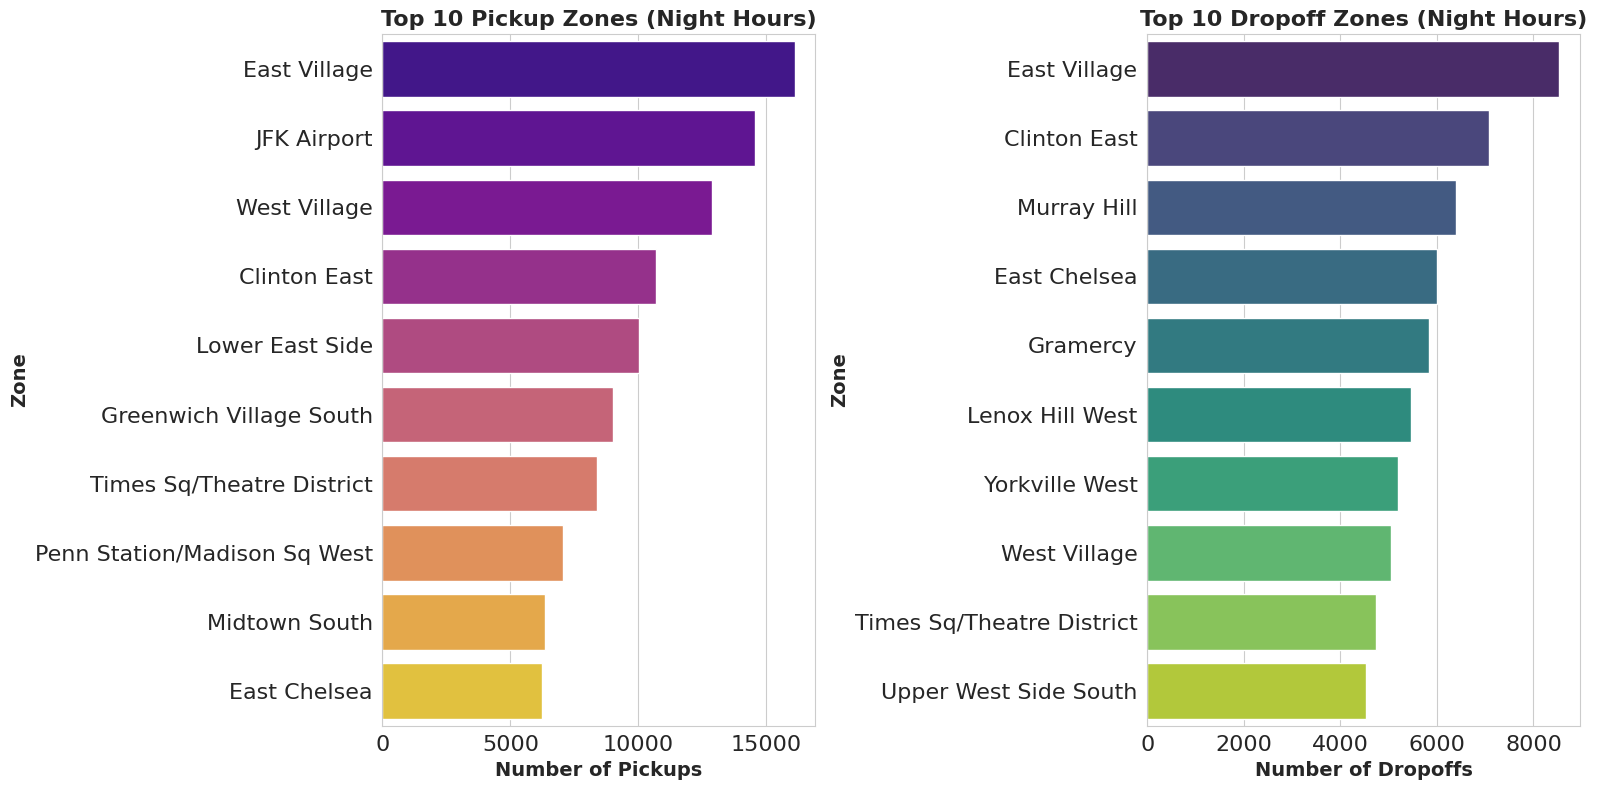

In [167]:
# Set plot style and increase figure quality
sns.set_style("whitegrid")
plt.figure(dpi=150)  # Increase DPI for better clarity

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Define font properties for better readability
title_font = {'fontsize': 16, 'fontweight': 'bold'}
label_font = {'fontsize': 14, 'fontweight': 'bold'}
tick_fontsize = 16

# Plot Pickup Zones
sns.barplot(data=top_pickup_zones_night, x='pickup_count', y='Zone', ax=axes[0], palette="plasma")
axes[0].set_title('Top 10 Pickup Zones (Night Hours)', **title_font)
axes[0].set_xlabel('Number of Pickups', **label_font)
axes[0].set_ylabel('Zone', **label_font)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)

# Plot Dropoff Zones
sns.barplot(data=top_dropoff_zones_night, x='dropoff_count', y='Zone', ax=axes[1], palette="viridis")
axes[1].set_title('Top 10 Dropoff Zones (Night Hours)', **title_font)
axes[1].set_xlabel('Number of Dropoffs', **label_font)
axes[1].set_ylabel('Zone', **label_font)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)

# Rotate Y-axis labels slightly for better readability
for ax in axes:
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [168]:
# Filter for night hours (11 PM to 5 AM)

# Night hours: 11 PM to 5 AM
night_hours_df = taxi_data_zones_merged[(taxi_data_zones_merged['pickup_hour'] >= 23) | (taxi_data_zones_merged['pickup_hour'] <= 5)]

# Day hours: 6 AM to 10 PM
day_hours_df = taxi_data_zones_merged[(taxi_data_zones_merged['pickup_hour'] >= 6) & (taxi_data_zones_merged['pickup_hour'] <= 22)]

# Calculate total revenue for night and day hours
total_revenue_night = night_hours_df['total_amount'].sum()
total_revenue_day = day_hours_df['total_amount'].sum()

# Calculate total revenue overall
total_revenue = taxi_data_zones_merged['total_amount'].sum()

# Calculate revenue share for night and day hours
night_revenue_share = total_revenue_night / total_revenue * 100
day_revenue_share = total_revenue_day / total_revenue * 100

print("night_revenue_share:-", night_revenue_share.round(2),"day_revenue_share:-", day_revenue_share.round(2))

night_revenue_share:- 12.19 day_revenue_share:- 87.81


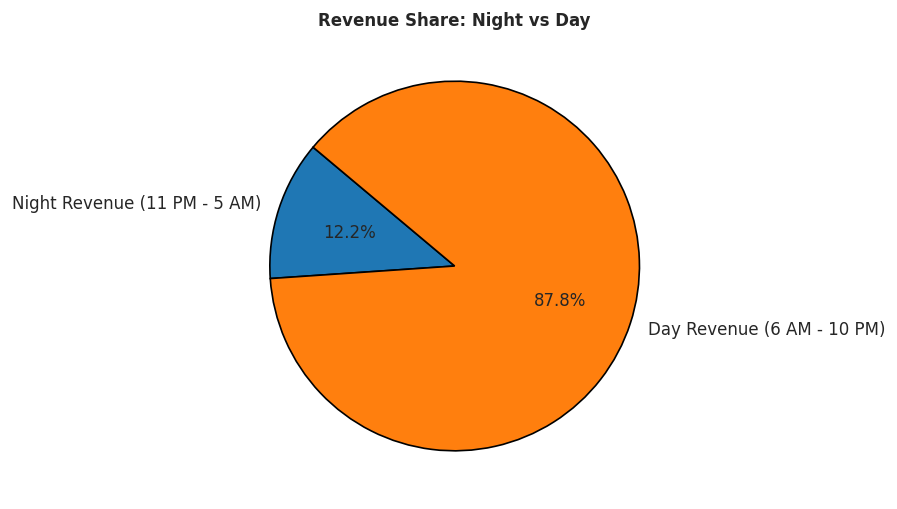

In [169]:
# Labels and values for the pie chart
labels = ['Night Revenue (11 PM - 5 AM)', 'Day Revenue (6 AM - 10 PM)']
values = [night_revenue_share, day_revenue_share]
colors = ['#1f77b4', '#ff7f0e']  # Red-orange for night, green for day

# Create a pie chart
plt.figure(figsize=(5, 5), dpi=120)
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Title and styling
plt.title('Revenue Share: Night vs Day', fontsize=10, fontweight='bold')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

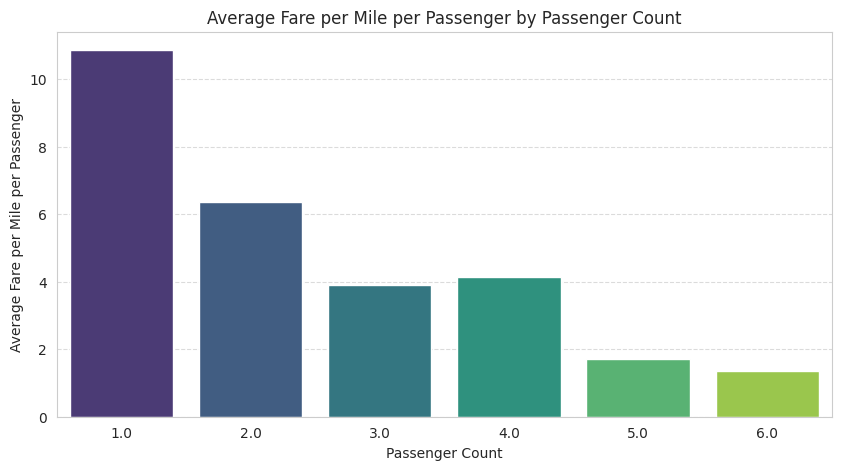

passenger_count  fare_per_mile_per_passenger
0              1.0                    10.867081
1              2.0                     6.352960
2              3.0                     3.903850
3              4.0                     4.150152
4              5.0                     1.710853
5              6.0                     1.351101

In [170]:
# Filter out invalid trip distances
taxi_data_zones_merged = taxi_data_zones_merged.loc[taxi_data_zones_merged['trip_distance'] > 0].copy()

# Compute fare per mile and fare per mile per passenger
taxi_data_zones_merged['fare_per_mile'] = taxi_data_zones_merged['fare_amount'] / taxi_data_zones_merged['trip_distance']
taxi_data_zones_merged['fare_per_mile_per_passenger'] = (
    taxi_data_zones_merged['fare_per_mile'] / taxi_data_zones_merged['passenger_count']
)

# Group by passenger count and compute average fare per mile per passenger
avg_fare_per_mile_per_passenger = taxi_data_zones_merged.groupby('passenger_count', as_index=False).agg(
    {'fare_per_mile_per_passenger': 'mean'}
)

# **Plotting the results**
plt.figure(figsize=(10, 5))
sns.barplot(
    data=avg_fare_per_mile_per_passenger,
    x='passenger_count',
    y='fare_per_mile_per_passenger',
    palette='viridis'
)
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare per Mile per Passenger")
plt.title("Average Fare per Mile per Passenger by Passenger Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()
avg_fare_per_mile_per_passenger

In [171]:
taxi_data_zones_merged.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'pickup_day', 'pickup_month', 'quarter', 'trip_duration', 'OBJECTID',
       'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'trip_duration_hours', 'dropoff_hour', 'fare_per_mile',
       'fare_per_mile_per_passenger'],
      dtype='object')

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

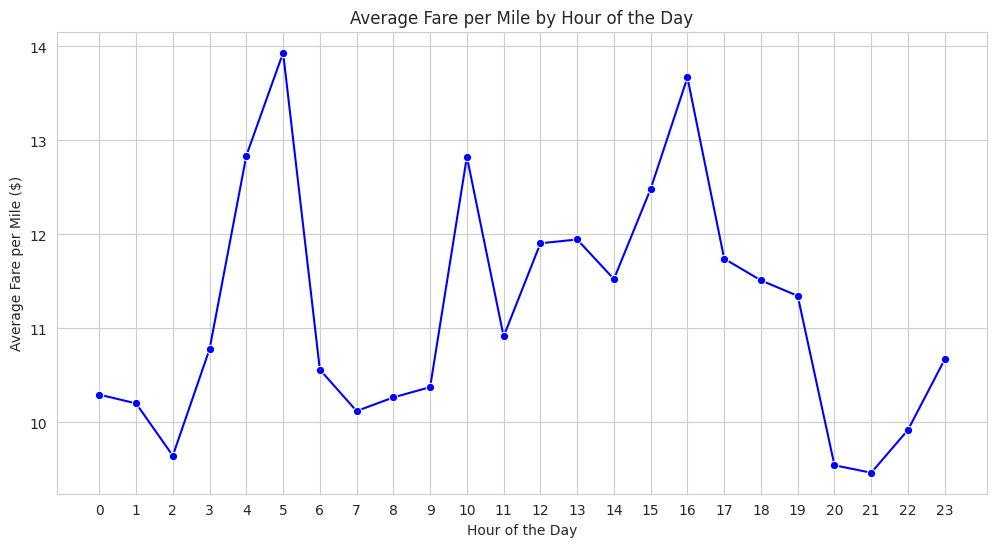

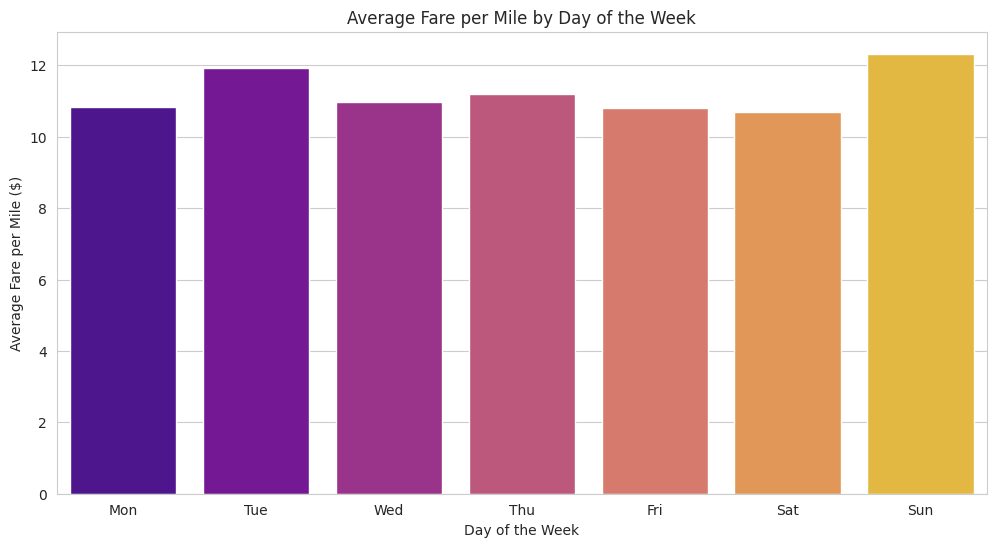

In [172]:
# Compare the average fare per mile for different days and for different times of the day

# Group by hour of the day and calculate average fare per mile
avg_fare_by_hour = taxi_data_zones_merged.groupby('pickup_hour')['fare_per_mile'].mean()

# Group by day of the week and calculate average fare per mile
avg_fare_by_day = taxi_data_zones_merged.groupby('pickup_day')['fare_per_mile'].mean()

# Plot the average fare per mile by hour of day
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_fare_by_hour.index, y=avg_fare_by_hour.values, marker='o', color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24), labels=[f"{i}" for i in range(0, 24)])
plt.show()

# Plot the average fare per mile by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_fare_by_day.index, y=avg_fare_by_day.values, palette="plasma")
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Day of the Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

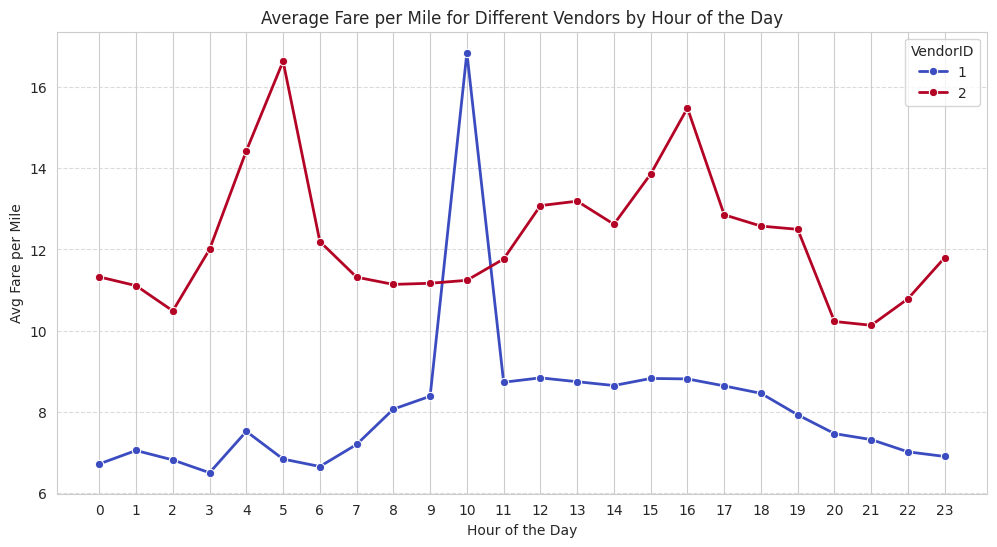

In [173]:
# Compare fare per mile for different vendors
fare_by_vendor_hour = taxi_data_zones_merged.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="pickup_hour", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_hour,
    marker="o", palette="coolwarm", linewidth=2, ci=95  # Adding confidence interval
)

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile for Different Vendors by Hour of the Day")
plt.xticks(range(0, 24))
plt.legend(title="VendorID")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dotted gridlines for better readability

plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


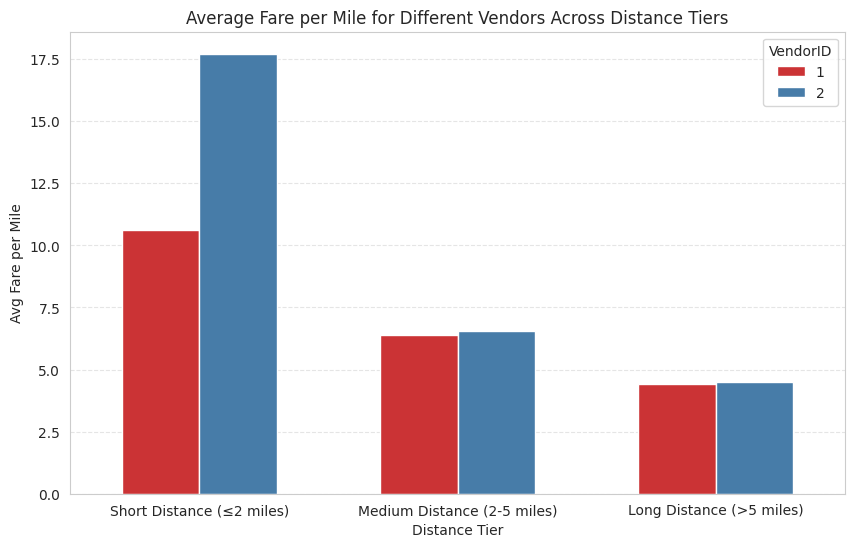

In [174]:
# Define distance categories
def categorize_distance(distance):
    if distance <= 2:
        return "Short Distance (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium Distance (2-5 miles)"
    else:
        return "Long Distance (>5 miles)"

# Apply categorization
taxi_data_zones_merged["distance_tier"] = taxi_data_zones_merged["trip_distance"].apply(categorize_distance)

# Ensure correct categorical order
distance_order = ["Short Distance (≤2 miles)", "Medium Distance (2-5 miles)", "Long Distance (>5 miles)"]
taxi_data_zones_merged["distance_tier"] = pd.Categorical(taxi_data_zones_merged["distance_tier"], categories=distance_order, ordered=True)

# Group by VendorID & Distance Tier
fare_by_vendor_tier = taxi_data_zones_merged.groupby(["VendorID", "distance_tier"], as_index=False).agg(
    {"fare_per_mile": "mean"}
)

# Create grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="distance_tier", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_tier, palette="Set1", dodge=True, width = .6)

# Formatting
plt.xlabel("Distance Tier")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile for Different Vendors Across Distance Tiers")
plt.legend(title="VendorID")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [175]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
taxi_data_zones_merged['tip_percentage'] = (taxi_data_zones_merged['tip_amount'] / taxi_data_zones_merged['fare_amount']) * 100

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

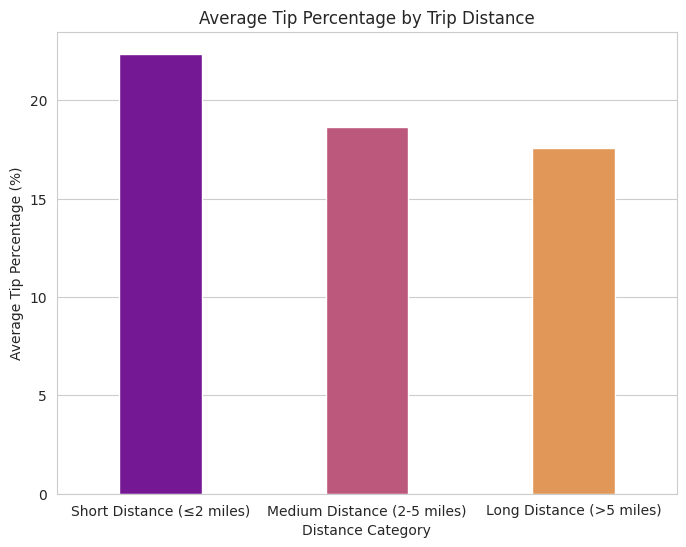

In [176]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Calculate the average tip percentage by distance category
avg_tip_by_distance = taxi_data_zones_merged.groupby('distance_tier')['tip_percentage'].mean().reset_index()


# Plot the average tip percentage by distance category
plt.figure(figsize=(8, 6))
sns.barplot(x="distance_tier", y="tip_percentage", data=avg_tip_by_distance, palette="plasma", width = .4)
plt.xlabel('Distance Category')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Trip Distance')
plt.xticks(rotation=0)
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

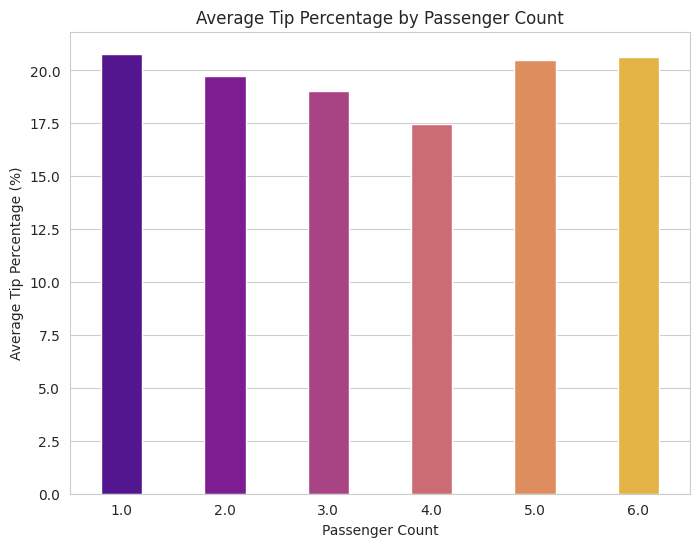

In [177]:
# Calculate the average tip percentage by passenger count
avg_tip_by_passenger_count = taxi_data_zones_merged.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Plot the average tip percentage by passenger count
plt.figure(figsize=(8, 6))
sns.barplot(x="passenger_count", y="tip_percentage", data=avg_tip_by_passenger_count, palette="plasma", width = .4)
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Passenger Count')
plt.xticks(rotation=0)
plt.show()

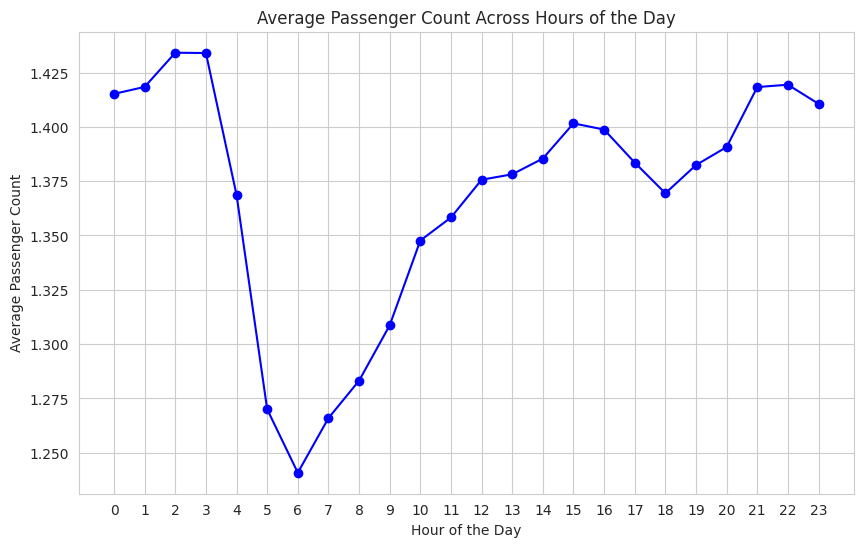

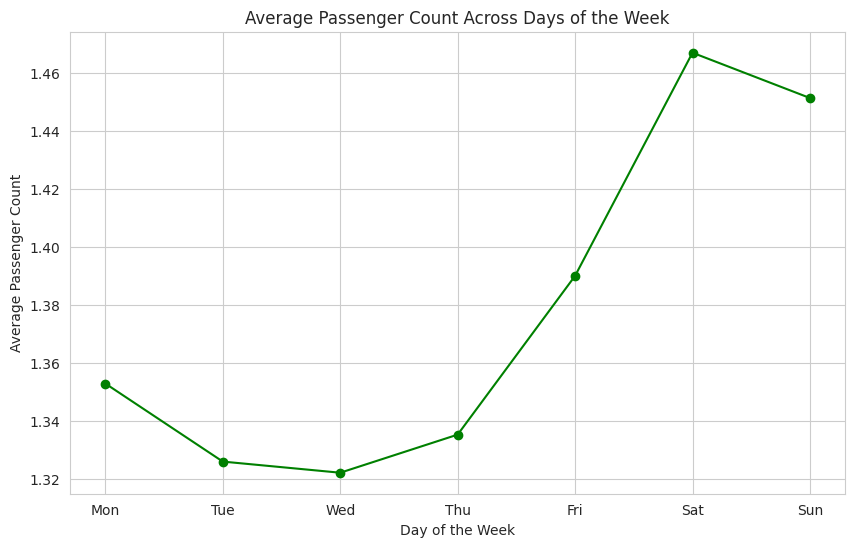

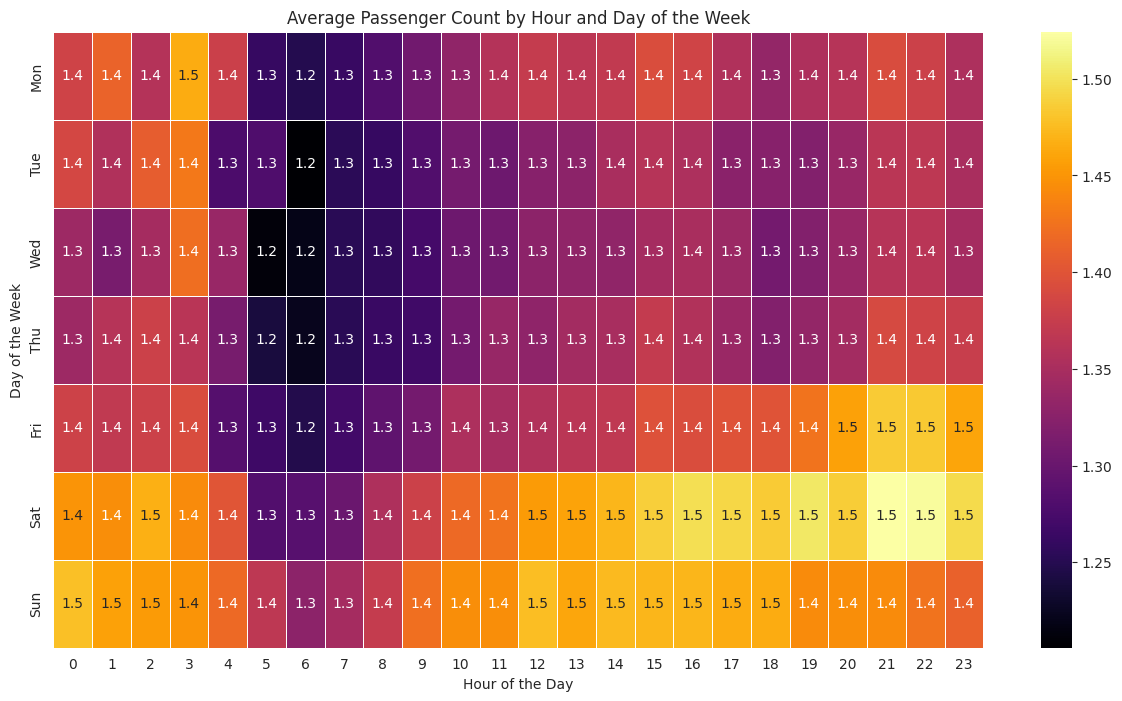

In [178]:
# See how passenger count varies across hours and days
# Group by hour of the day and calculate average passenger count
avg_passenger_by_hour = taxi_data_zones_merged.groupby('pickup_hour')['passenger_count'].mean()

# Group by day of the week and calculate average passenger count
avg_passenger_by_day = taxi_data_zones_merged.groupby('pickup_day')['passenger_count'].mean()

passenger_heatmap = taxi_data_zones_merged.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().unstack()

# Plot the variation of passenger count across hours of the day
plt.figure(figsize=(10, 6))
plt.plot(avg_passenger_by_hour.index, avg_passenger_by_hour.values, marker='o', color='b')
plt.title('Average Passenger Count Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 24))  # Set x-ticks to represent hours of the day (0-23)
plt.grid(True)
plt.show()

# Plot the variation of passenger count across days of the week
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10, 6))
plt.plot(avg_passenger_by_day.index, avg_passenger_by_day.values, marker='o', color='g')
plt.title('Average Passenger Count Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 7), days_of_week)  # Set x-ticks to represent days of the week
plt.grid(True)
plt.show()

#Heatmap - Passenger Count by Hour & Day
plt.figure(figsize=(15, 8))
sns.heatmap(passenger_heatmap, cmap="inferno", annot=True, fmt=".1f", linewidths=0.5, xticklabels=range(0, 24), yticklabels=days_of_week)
plt.title("Average Passenger Count by Hour and Day of the Week")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

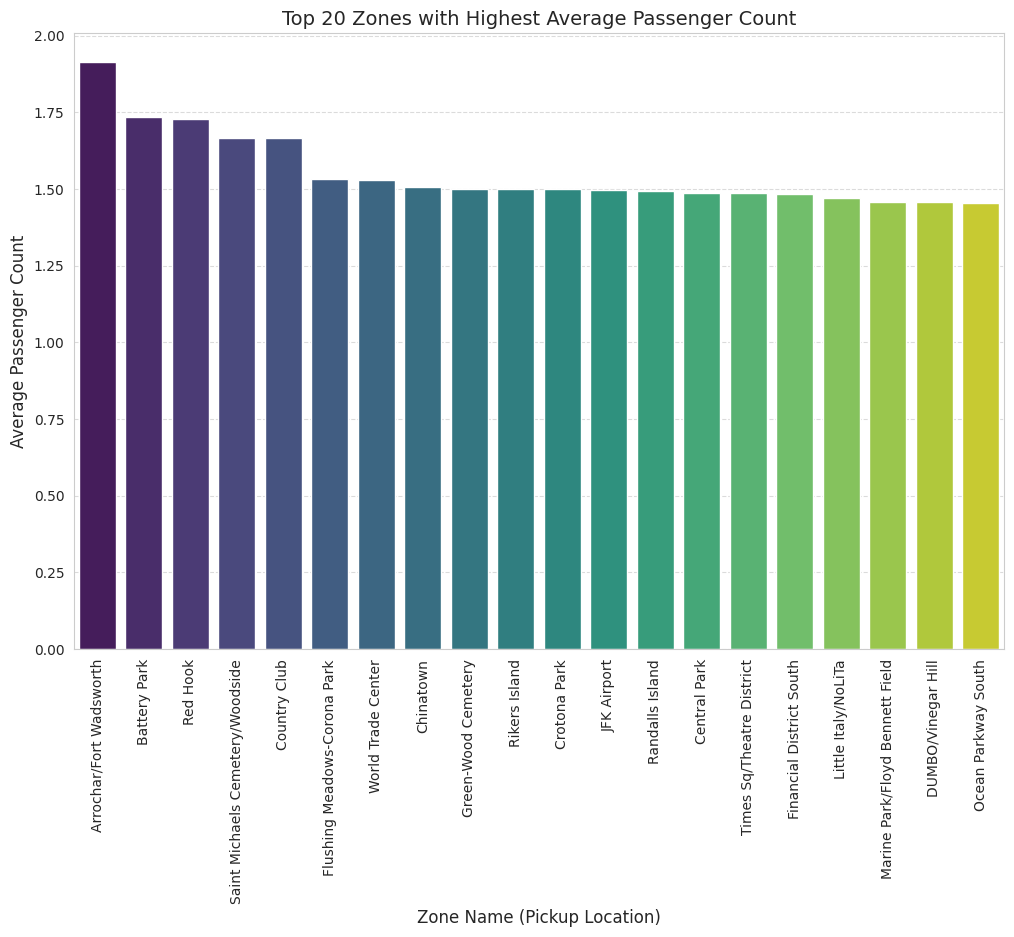

In [179]:
# How does passenger count vary across zones
# Group by 'zone' and calculate average passenger count
avg_passenger_by_zone = taxi_data_zones_merged.groupby('zone')['passenger_count'].mean()

# Sort in descending order for better visualization
avg_passenger_by_zone_sorted = avg_passenger_by_zone.sort_values(ascending=False).reset_index()

# **Plot top 20 zones with highest average passenger count**
plt.figure(figsize=(12, 8))
sns.barplot(x="zone", y="passenger_count", data=avg_passenger_by_zone_sorted.head(20), palette="viridis")

# Formatting
plt.title("Top 20 Zones with Highest Average Passenger Count", fontsize=14)
plt.xlabel("Zone Name (Pickup Location)", fontsize=12)
plt.ylabel("Average Passenger Count", fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()

In [180]:
taxi_data_zones_merged.columns.to_list()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month',
 'quarter',
 'trip_duration',
 'OBJECTID',
 'Shape_Leng',
 'Shape_Area',
 'zone',
 'LocationID',
 'borough',
 'geometry',
 'trip_duration_hours',
 'dropoff_hour',
 'fare_per_mile',
 'fare_per_mile_per_passenger',
 'distance_tier',
 'tip_percentage']

In [181]:
# Drop duplicate columns
taxi_data_zones_merged = taxi_data_zones_merged.drop(columns=['LocationID_dropoff', 'zone_dropoff'], errors='ignore')

# Verify that the columns are removed
print(taxi_data_zones_merged.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'pickup_day', 'pickup_month', 'quarter', 'trip_duration', 'OBJECTID',
       'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'trip_duration_hours', 'dropoff_hour', 'fare_per_mile',
       'fare_per_mile_per_passenger', 'distance_tier', 'tip_percentage'],
      dtype='object')


In [182]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Create a mapping of LocationID to Zone Name
location_to_zone = taxi_data_zones_merged[['LocationID', 'zone']].drop_duplicates()

# Merge drop-off location names into the dataset
taxi_data_zones_merged = taxi_data_zones_merged.merge(location_to_zone, left_on="DOLocationID", right_on="LocationID", how="left", suffixes=("", "_dropoff"))
# Group by Drop-off Zone Name instead of ID
avg_passenger_by_dropoff = taxi_data_zones_merged.groupby("zone_dropoff")["passenger_count"].mean().reset_index()

# Sort in descending order
avg_passenger_by_dropoff_sorted = avg_passenger_by_dropoff.sort_values(by="passenger_count", ascending=False)

# Plot top 20 drop-off zones
plt.figure(figsize=(12, 6))
sns.barplot(x="zone_dropoff", y="passenger_count", data=avg_passenger_by_dropoff_sorted.head(20), palette="coolwarm")
plt.xlabel("Drop-off Zone")
plt.ylabel("Average Passenger Count")
plt.title("Top 20 Drop-off Zones by Passenger Count")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

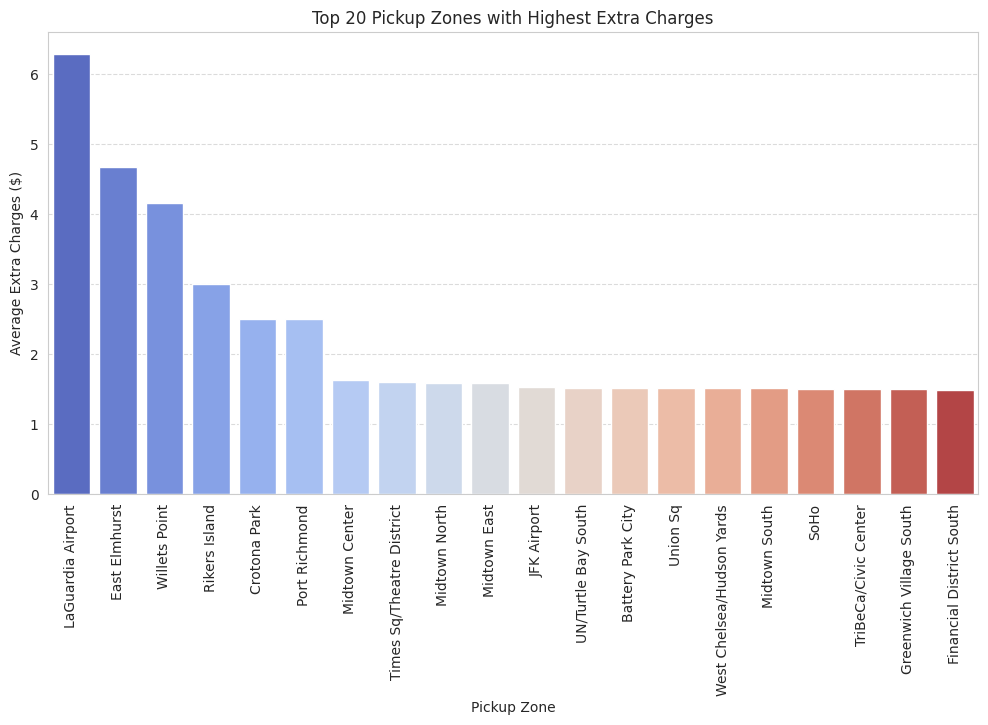

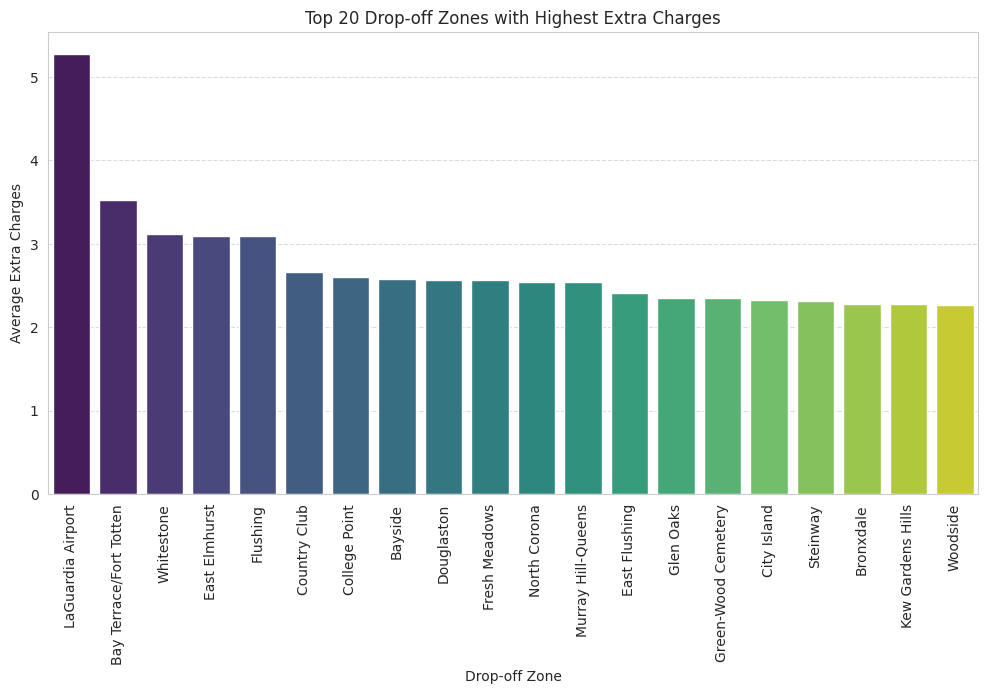

In [183]:
# How often is each surcharge applied?
# Calculate total extra charges per pickup zone
extra_by_pickup = taxi_data_zones_merged.groupby("zone")["extra"].mean().reset_index()

# Sort in descending order
extra_by_pickup_sorted = extra_by_pickup.sort_values(by="extra", ascending=False)

# Plot top 20 zones with highest extra charges
plt.figure(figsize=(12, 6))
sns.barplot(x="zone", y="extra", data=extra_by_pickup_sorted.head(20), palette="coolwarm")
plt.xlabel("Pickup Zone")
plt.ylabel("Average Extra Charges ($)")
plt.title("Top 20 Pickup Zones with Highest Extra Charges")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Repeat for drop-off zones
extra_by_dropoff = taxi_data_zones_merged.groupby("zone_dropoff")["extra"].mean().reset_index()
extra_by_dropoff_sorted = extra_by_dropoff.sort_values(by="extra", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="zone_dropoff", y="extra", data=extra_by_dropoff_sorted.head(20), palette="viridis")
plt.xlabel("Drop-off Zone")
plt.ylabel("Average Extra Charges")
plt.title("Top 20 Drop-off Zones with Highest Extra Charges")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

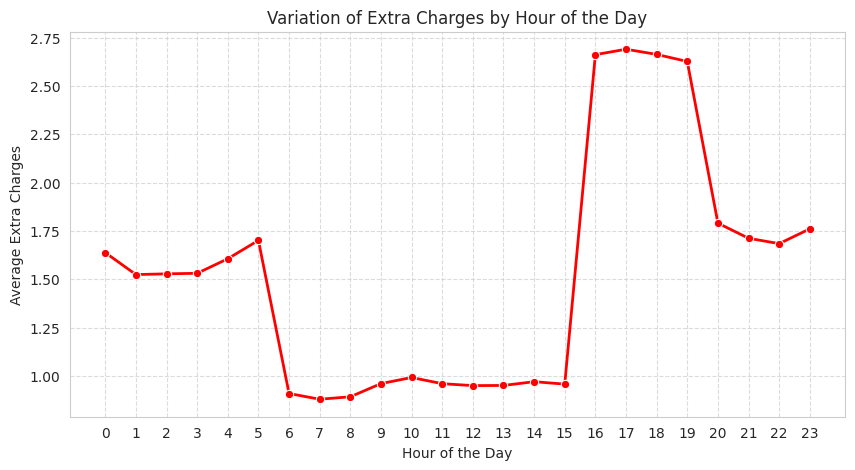

In [184]:
# Group by hour of the day and calculate average extra charges
extra_by_hour = taxi_data_zones_merged.groupby("pickup_hour")["extra"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=extra_by_hour, x="pickup_hour", y="extra", marker="o", color="r", linewidth=2)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Extra Charges")
plt.title("Variation of Extra Charges by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

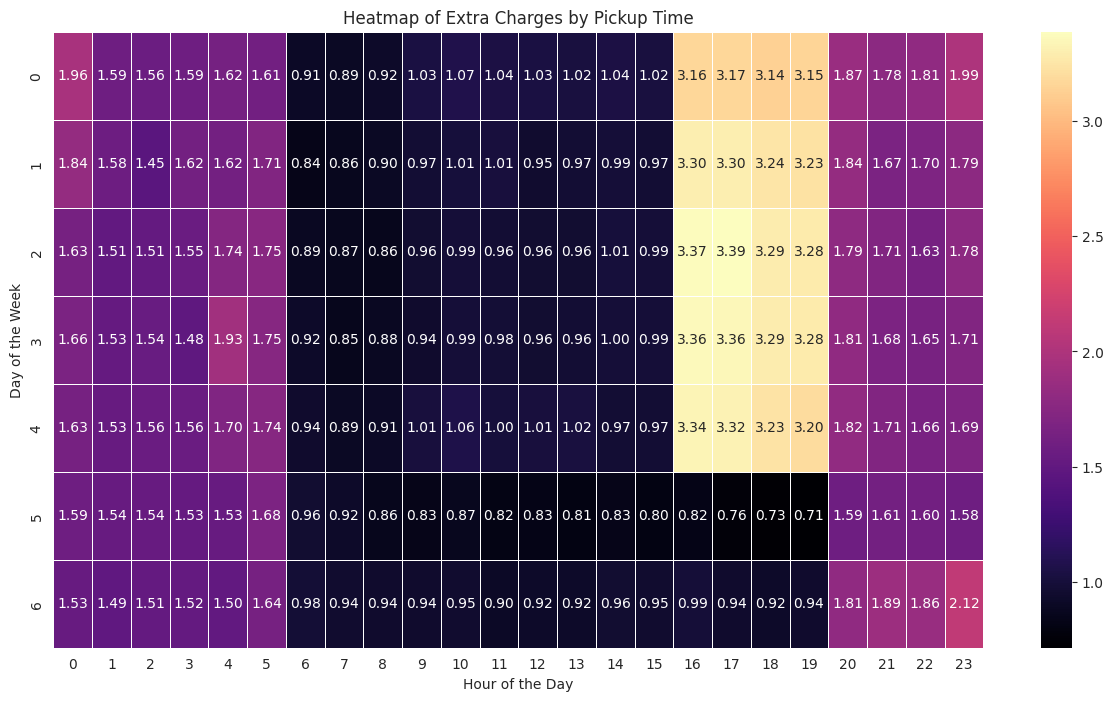

In [185]:
# Group by pickup day and hour to calculate average extra charges
extra_heatmap_data = taxi_data_zones_merged.groupby(["pickup_day", "pickup_hour"])["extra"].mean().unstack()

# Create heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(extra_heatmap_data, cmap="magma", annot=True, fmt=".2f", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Heatmap of Extra Charges by Pickup Time")
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

High demand zones: Manhattan consistently saw the highest number of pickups and drop-offs, especially around Midtown and Lower Manhattan.

Time of day: Peak demand was observed during morning (7–10 AM) and evening rush hours (5–8 PM).

Day of week: Fridays had the highest volume of rides, followed closely by Thursdays. Weekends saw lower rides but higher average fares, possibly due to leisure travel.

Trip duration and distance: Trips were generally short in distance and time in high-density areas, while longer trips often involved airport routes or outer boroughs.

Fare analysis: There were instances of negative or zero fare amounts, which were filtered or corrected. Fare distribution was right-skewed, indicating a majority of low-fare trips.

Airport-related trips: JFK and LaGuardia trips formed a significant chunk of long-distance rides, often including additional airport fees.

Operational inefficiencies: Idle pickups (zero passengers or multiple zero-amount transactions) hint at either data anomalies or non-revenue rides (possibly test data or rebalancing trips).

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

• Night Routing: Deploy more cabs around high night pickup zones (East Village, JFK, West Village) between 11 PM and 2 AM. Use fewer in low-demand boroughs like Bronx/Staten Island at those hours.

• Airport Strategy: Given LaGuardia and JFK have high extra charges and sustained traffic, maintain short-haul shuttles to/from these airports during day and night shifts.

• Avoid Inefficient Zones: Identify and deprioritize dispatch to zones with high drop-offs but low pickups (e.g., residential-only areas), unless high return trip potential is predicted.

• Live Rebalancing: Use real-time passenger count & trip flow data to reallocate idle cabs dynamically from stagnant to high-flow areas based on hourly trends.

• Trip Pairing Algorithms: For areas with low average passenger count but high demand, encourage pooling or "back-to-back dispatches" via mobile app features.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Time Based Deployment: Increase cab density in downtown Manhattan from 5 PM–2 AM on weekends. Reduce weekday daytime supply in areas like outer Bronx or Staten Island.

Zone Staging: Maintain buffer fleets at JFK, LGA, Midtown, and Financial District for peak-hour surge absorption. Use real-time trip density dashboards to rotate fleet.

Day-Part Mapping: Divide each day into 3 demand tiers:

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

• Distance-Tiered Pricing: Apply tiered discounting for medium-to-long trips (e.g., >5 miles) to incentivize longer rides which showed lower average per-mile rates.

• Dynamic Surge Pricing: Use hourly & zonal trends to implement flexible pricing models (e.g., fare multipliers in Times Sq, Midtown, LGA during peak hours/weekends).

• Cab-Pooling Rewards: Introduce fare sharing with lower fare-per-mile on 2+ passenger trips to optimize for revenue and vehicle occupancy. This offsets the low avg passenger count.

• Airport Premium Bundles: For JFK/LGA rides, create flat-fee packages including tolls + premium surcharges to improve fare transparency and user trust.

• Vendor Price Benchmarking: Keep Vendor 1 and 2 rate gaps visible. If Vendor 2 continues higher pricing on short trips, highlight savings with Vendor 1 to draw cost-sensitive users